# World Health Statistics
### Merged according to category similarity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# Define the directory path
directory = r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\DataSets\WorldHealth"

# Define the filenames for each group of CSV files
mortality_files = ["infantMortalityRate.csv", "under5MortalityRate.csv", "neonatalMortalityRate.csv", "mortalityRatePoisoning.csv", "crudeSuicideRates.csv", "30-70cancerChdEtc.csv"]
life_expectancy_files = ["lifeExpectancyAtBirth.csv",  "HALElifeExpectancyAtBirth.csv"]
region_files =["WHOregionLifeExpectancyAtBirth.csv", "HALeWHOregionLifeExpectancyAtBirth.csv","%HaleInLifeExpectancy.csv"]
health_services_files = ["basicDrinkingWaterServices.csv", "atLeastBasicSanitizationServices.csv", "safelySanitization.csv", "basicHandWashing.csv", "birthAttendedBySkilledPersonal.csv"]
disease_incidence_files = ["interventionAgianstNTDs.csv", "incedenceOfMalaria.csv", "incedenceOfTuberculosis.csv", "hepatitusBsurfaceAntigen.csv", "newHivInfections.csv"]
maternal_health_files = ["maternalMortalityRatio.csv"]

# Function to merge CSV files
def merge_csv_files(files):
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            dfs.append(df)
        else:
            print(f"File '{file}' not found.")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        return merged_df
    else:
        return None


# Merge mortality files
merged_mortality = merge_csv_files(mortality_files)

# Merge life expectancy files
merged_life_expectancy = merge_csv_files(life_expectancy_files)

# Merge region files
merged_region_expectancy = merge_csv_files(region_files)

# Merge health services files
merged_health_services = merge_csv_files(health_services_files)

# Merge disease incidence files
merged_disease_incidence = merge_csv_files(disease_incidence_files)

# Merge maternal health files
merged_maternal_health = merge_csv_files(maternal_health_files)


In [3]:
# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Loop through each CSV file
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(directory, file)
    
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Display basic information about the DataFrame
    print(f"Information about {file}:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())
    print("\nSample data:")
    print(df.head())
    print("\n\n")


Information about %HaleInLifeExpectancy.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      72 non-null     object 
 1   Period                        72 non-null     int64  
 2   Indicator                     72 non-null     object 
 3   Dim1                          72 non-null     object 
 4   Hale Expectency               72 non-null     float64
 5   Life expectany                72 non-null     float64
 6   Unnamed: 6                    72 non-null     float64
 7   % OF HALE in life expectancy  72 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ KB
None

Summary statistics:
            Period  Hale Expectency  Life expectany  Unnamed: 6  \
count    72.000000        72.000000       72.000000   72.000000   
mean   2011.000000        61.403333      

### Merged Mortality

In [4]:
if merged_mortality is not None:
    print("Merged Mortality Data:")
    print(merged_mortality.head())

Merged Mortality Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2019  Infant mortality rate (probability of dying be...   
1  Afghanistan    2019  Infant mortality rate (probability of dying be...   
2  Afghanistan    2019  Infant mortality rate (probability of dying be...   
3  Afghanistan    2018  Infant mortality rate (probability of dying be...   
4  Afghanistan    2018  Infant mortality rate (probability of dying be...   

         Dim1        First Tooltip  
0  Both sexes  46.51 [37.71-55.82]  
1        Male    49.8 [40.2-59.95]  
2      Female  43.05 [34.82-51.96]  
3  Both sexes  48.04 [39.94-56.32]  
4        Male   51.35 [42.56-60.4]  


 **The output displays columns like Location, Period, Indicator, Dim1, and First Tooltip
The First Tooltip column has ranges so must look on that.
Dim1 might be dropped.**

In [5]:
# Check for missing values in the merged_life_expectancy DataFrame
missing_values_mortality = merged_mortality.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_mortality)


       Location  Period  Indicator   Dim1  First Tooltip
0         False   False      False  False          False
1         False   False      False  False          False
2         False   False      False  False          False
3         False   False      False  False          False
4         False   False      False  False          False
...         ...     ...        ...    ...            ...
77363     False   False      False  False          False
77364     False   False      False  False          False
77365     False   False      False  False          False
77366     False   False      False  False          False
77367     False   False      False  False          False

[77368 rows x 5 columns]


**False means no null values. There are no missing values to deal with.**

#### Check Unique Values

In [6]:
unique_counts = merged_mortality.nunique()
print(unique_counts)

Location           200
Period              70
Indicator            6
Dim1                 3
First Tooltip    69311
dtype: int64


In [7]:
merged_mortality.describe()

,Period
count,77368.000000
mean,1991.856969
std,18.531457
min,1950.000000
25%,1978.000000
50%,1995.000000
75%,2008.000000
max,2019.000000


In [8]:
print(merged_mortality.dtypes)

Location         object
Period            int64
Indicator        object
Dim1             object
First Tooltip    object
dtype: object


**location, indicator, dim1, first tooltip are all categorical variables.**

**location, indicator, dim1, first tooltip are all categorical variables. <br>
First Tooltip should be numerical so this will be converted. <br>
 Location and Indicators will be encoded since they are categorical. <br>
 Location: Represents the location or country name where the data was collected. <br>
Period: Indicates the year or time period of the data entry.<br>
Indicator: Describes the type of mortality indicator being measured (e.g., infant mortality rate).<br>
Dim1: Likely represents a demographic dimension such as gender or age group.<br>
First Tooltip: Contains the numerical value of the mortality rate or a related metric. <br>
Dim1 is irrelevant to our main question so will be dropped.**

In [9]:
merged_mortality.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82]
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95]
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96]
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32]
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4]


In [10]:
# Remove brackets and values inside them, ranges are unnecessary 
merged_mortality['First Tooltip'] = merged_mortality['First Tooltip'].str.extract(r'(\d+\.\d+)', expand=False)

# Convert 'First Tooltip' to float
merged_mortality['First Tooltip'] = merged_mortality['First Tooltip'].astype(float)

# Print the cleaned DataFrame
merged_mortality.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35


In [11]:
#Dim1 is irrelevant to our analysis so we will drop it 

# Print the columns in your DataFrame
print(merged_mortality.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_mortality.columns:
    # Drop the 'Dim1' column
    merged_mortality.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_mortality.head()


Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,51.35


In [12]:
merged_mortality.describe()

,Period,First Tooltip
count,77368.000000,69126.000000
mean,1991.856969,60.881054
std,18.531457,65.126847
min,1950.000000,0.730000
25%,1978.000000,14.510000
50%,1995.000000,35.920000
75%,2008.000000,86.667500
max,2019.000000,429.700000


#### Check for Duplicates

In [13]:
duplicate_rows = merged_mortality[merged_mortality.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
           Location  Period  \
4649   Burkina Faso    1960   
13556         India    1998   
21782         Niger    1984   
23575          Peru    1960   
25720   Saint Lucia    1954   
...             ...     ...   
77361      Zimbabwe    2010   
77363      Zimbabwe    2005   
77364      Zimbabwe    2005   
77366      Zimbabwe    2000   
77367      Zimbabwe    2000   

                                               Indicator  First Tooltip  
4649   Infant mortality rate (probability of dying be...         144.50  
13556  Infant mortality rate (probability of dying be...          71.34  
21782  Infant mortality rate (probability of dying be...         124.90  
23575  Infant mortality rate (probability of dying be...         145.70  
25720  Infant mortality rate (probability of dying be...         122.50  
...                                                  ...            ...  
77361  Probability (%) of dying between age 30 and ex...            NaN  
77363  Probability 

#### Visualizations

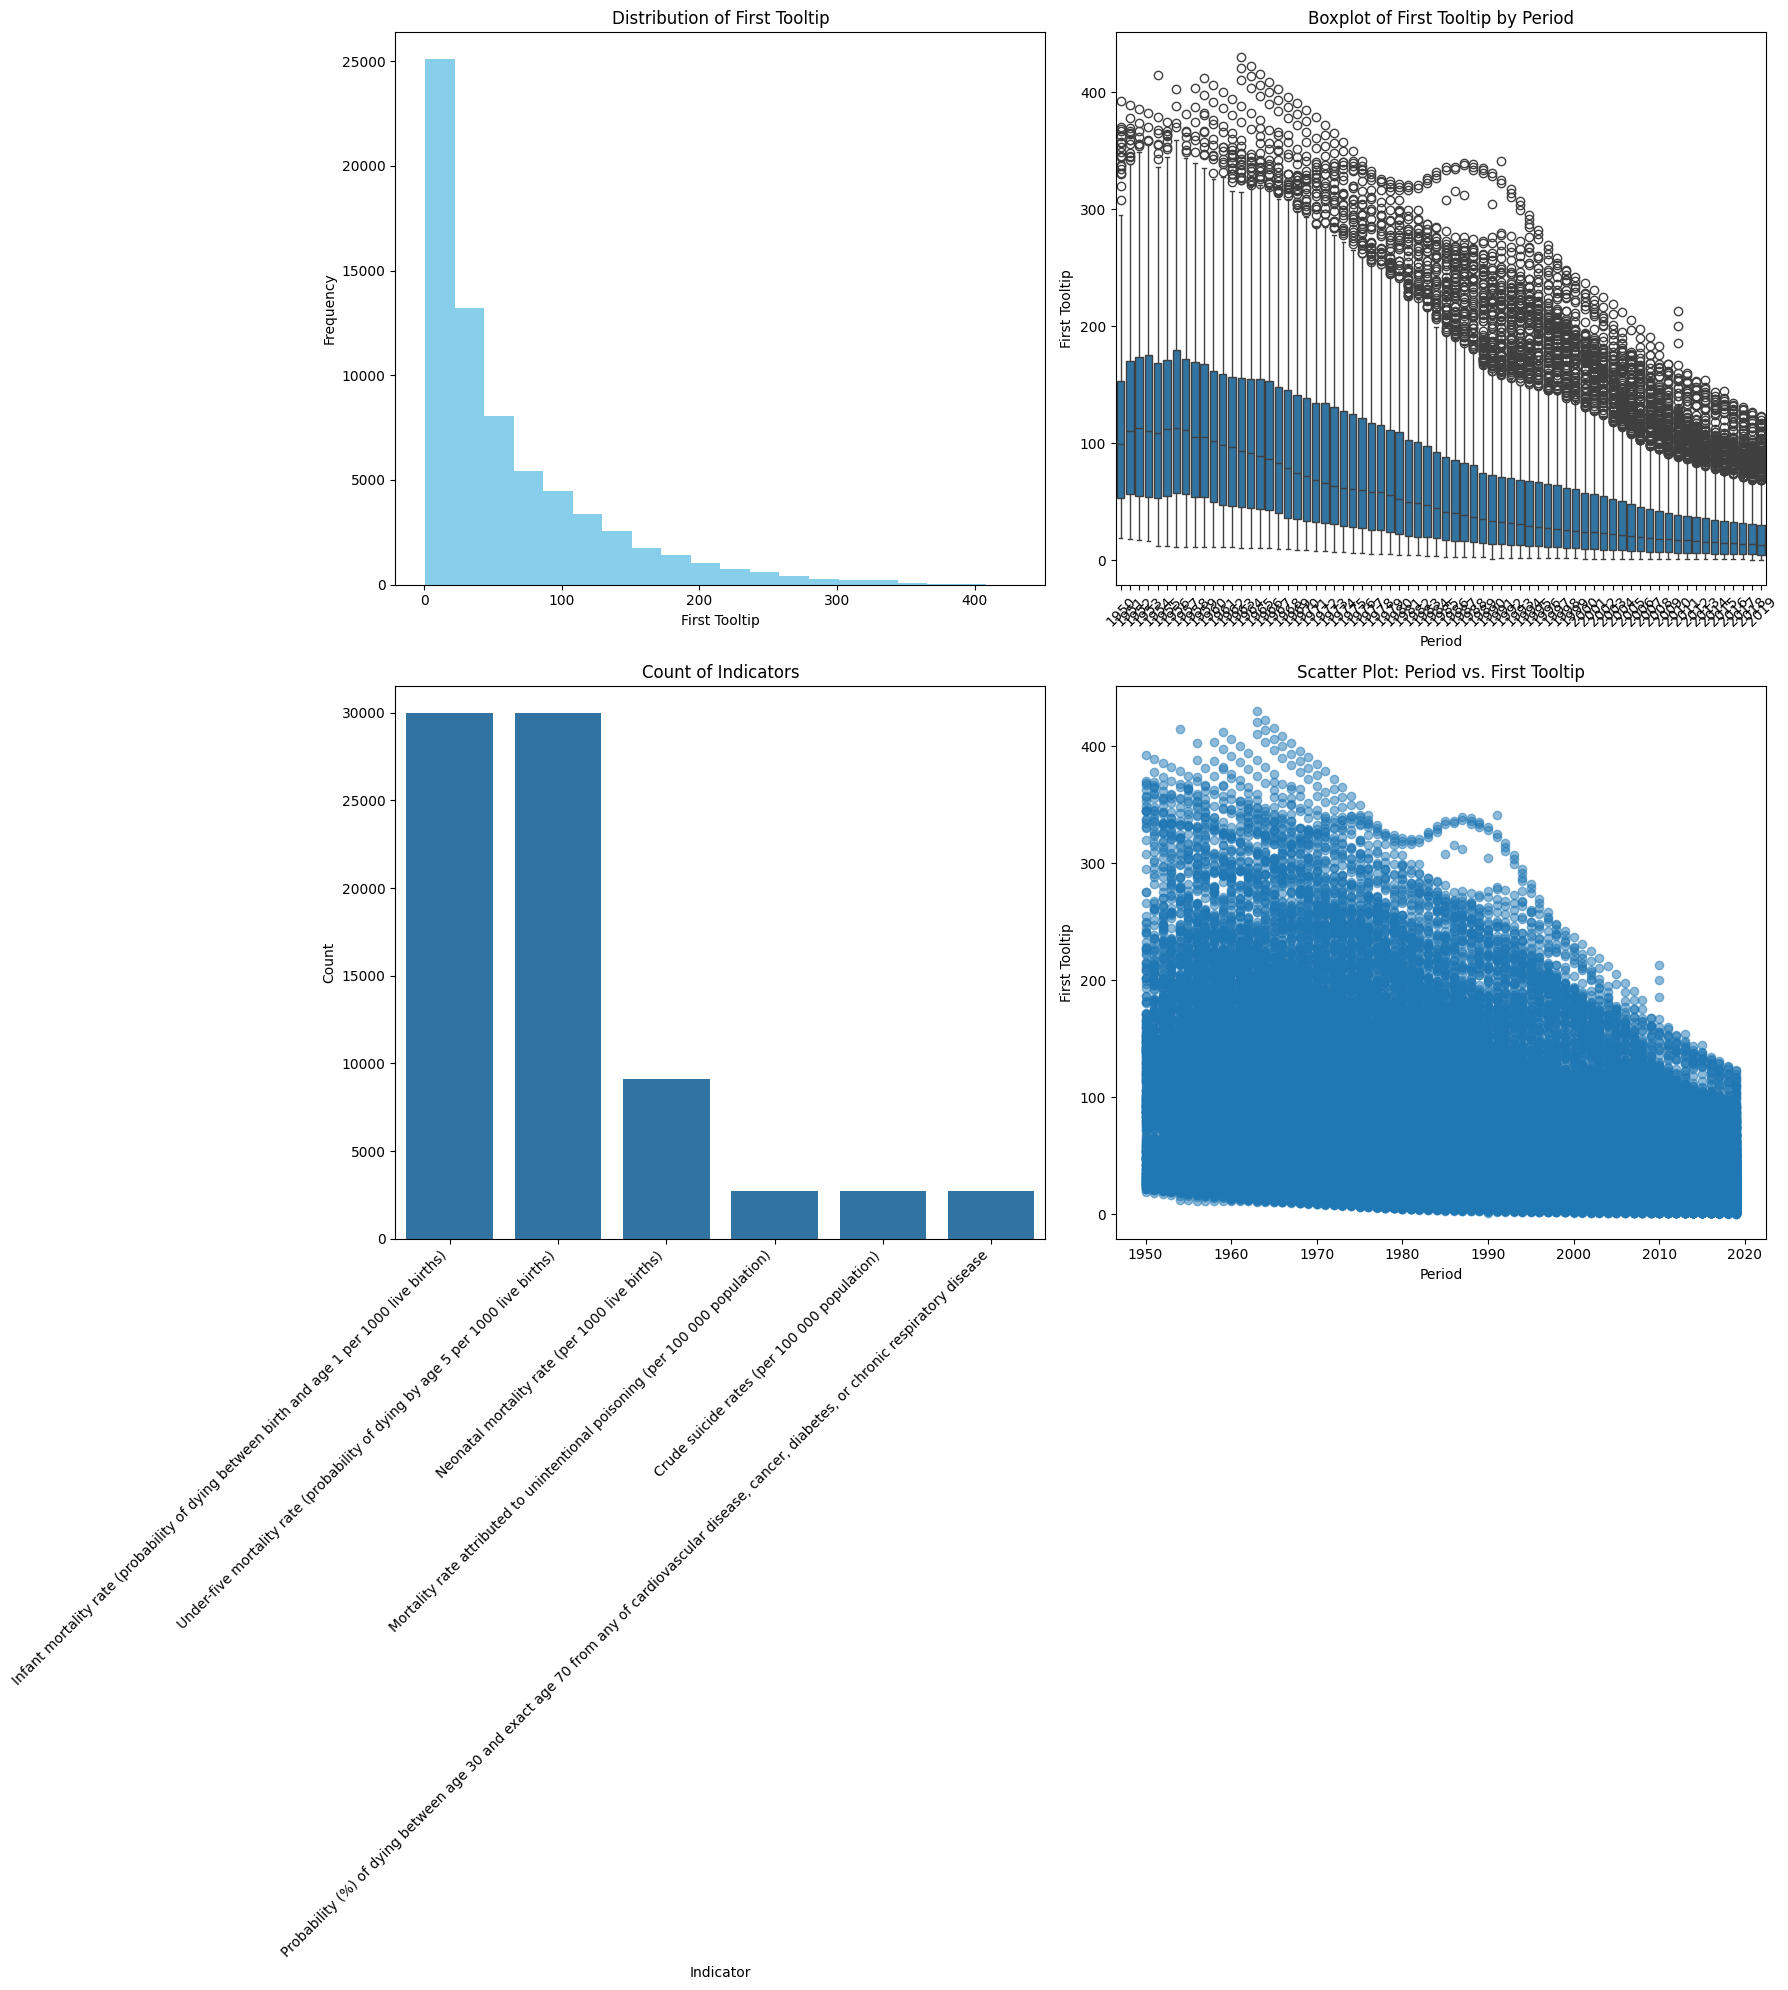

In [14]:
plt.figure(figsize=(18, 20))

# Histogram for 'First Tooltip'
plt.subplot(2, 2, 1)
plt.hist(merged_mortality['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')

# Box plot for 'First Tooltip' grouped by 'Period'
plt.subplot(2, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_mortality)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for 'Indicator' frequencies
plt.subplot(2, 2, 3)
sns.countplot(x='Indicator', data=merged_mortality)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for 'Period' vs 'First Tooltip'
plt.subplot(2, 2, 4)
plt.scatter(merged_mortality['Period'], merged_mortality['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# Calculate the first and third quartiles
Q1 = merged_mortality['First Tooltip'].quantile(0.25)
Q3 = merged_mortality['First Tooltip'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = merged_mortality[(merged_mortality['First Tooltip'] < lower_bound) |
                                  (merged_mortality['First Tooltip'] > upper_bound)]

# Print the outliers
print("Outliers in 'First Tooltip' column:")
print(outliers)

Outliers in 'First Tooltip' column:
          Location  Period                                          Indicator  \
139    Afghanistan    1973  Infant mortality rate (probability of dying be...   
142    Afghanistan    1972  Infant mortality rate (probability of dying be...   
144    Afghanistan    1971  Infant mortality rate (probability of dying be...   
145    Afghanistan    1971  Infant mortality rate (probability of dying be...   
147    Afghanistan    1970  Infant mortality rate (probability of dying be...   
...            ...     ...                                                ...   
59934     Thailand    1952  Under-five mortality rate (probability of dyin...   
59936     Thailand    1951  Under-five mortality rate (probability of dyin...   
59937     Thailand    1951  Under-five mortality rate (probability of dyin...   
59939     Thailand    1950  Under-five mortality rate (probability of dyin...   
59940     Thailand    1950  Under-five mortality rate (probability of dyi

**The outliers here show that due to the extremely wide range in First Tooltip. The way to handle these is either through applying imputation and/or transformation. Thus, this will be decided after getting insights on all 3 datasets(health,income, meat).**

### Merged Life Expectency


In [16]:
if merged_life_expectancy is not None:
    print("Merged Life Expectancy Data:")
    print(merged_life_expectancy.head())

Merged Life Expectancy Data:
      Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04  


In [17]:
merged_life_expectancy.tail()

,Location,Period,Indicator,Dim1,First Tooltip
4388,Zimbabwe,2010,Healthy life expectancy (HALE) at birth (years),Male,44.25
4389,Zimbabwe,2010,Healthy life expectancy (HALE) at birth (years),Female,46.12
4390,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Both sexes,41.03
4391,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Male,40.39
4392,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Female,41.77


In [18]:
# Check for missing values in the merged_life_expectancy DataFrame
missing_values_life_expectancy = merged_life_expectancy.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_life_expectancy)


      Location  Period  Indicator   Dim1  First Tooltip
0        False   False      False  False          False
1        False   False      False  False          False
2        False   False      False  False          False
3        False   False      False  False          False
4        False   False      False  False          False
...        ...     ...        ...    ...            ...
4388     False   False      False  False          False
4389     False   False      False  False          False
4390     False   False      False  False          False
4391     False   False      False  False          False
4392     False   False      False  False          False

[4393 rows x 5 columns]


In [19]:
merged_life_expectancy.describe()

,Period,First Tooltip
count,4393.000000,4393.000000
mean,2010.979285,65.811598
std,7.237751,9.427245
min,1920.000000,25.370000
25%,2000.000000,60.070000
50%,2010.000000,66.280000
75%,2015.000000,72.200000
max,2019.000000,86.940000


In [20]:
print(merged_life_expectancy.dtypes)

#Mean: Use the mean when the data is normally distributed and does not have outliers.
#Median: Use the median when the data has outliers or is not normally distributed.
#Mode: Use the mode for categorical or discrete data, although in your case, you're dealing with continuous variables.

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object


In [21]:
merged_life_expectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [22]:
#Dim1 is irrelevant to our analysis so we will drop it 

# Print the columns in your DataFrame
print(merged_life_expectancy.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_life_expectancy.columns:
    # Drop the 'Dim1' column
    merged_life_expectancy.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_life_expectancy.head()

Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),63.21
1,Afghanistan,2019,Life expectancy at birth (years),63.29
2,Afghanistan,2019,Life expectancy at birth (years),63.16
3,Afghanistan,2015,Life expectancy at birth (years),61.65
4,Afghanistan,2015,Life expectancy at birth (years),61.04


#### Checking for Duplicate Rows

In [23]:
duplicate_rows = merged_life_expectancy[merged_life_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
      Location  Period                                        Indicator  \
3261    Kuwait    2010  Healthy life expectancy (HALE) at birth (years)   
3651      Oman    2019  Healthy life expectancy (HALE) at birth (years)   
3665  Pakistan    2015  Healthy life expectancy (HALE) at birth (years)   

      First Tooltip  
3261          69.21  
3651          64.51  
3665          55.78  


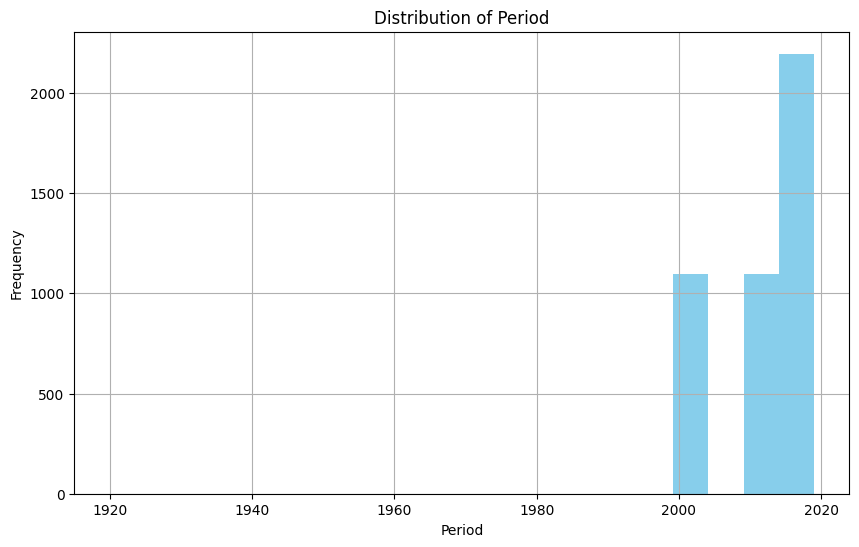

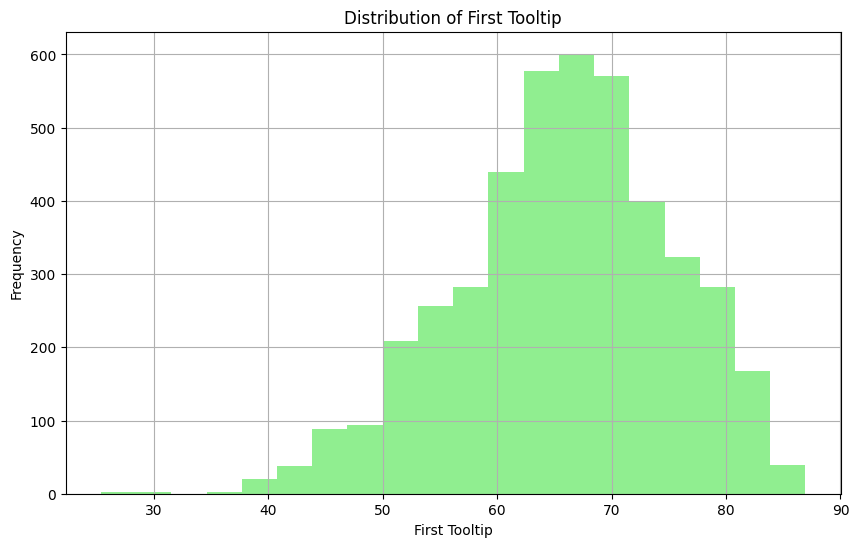

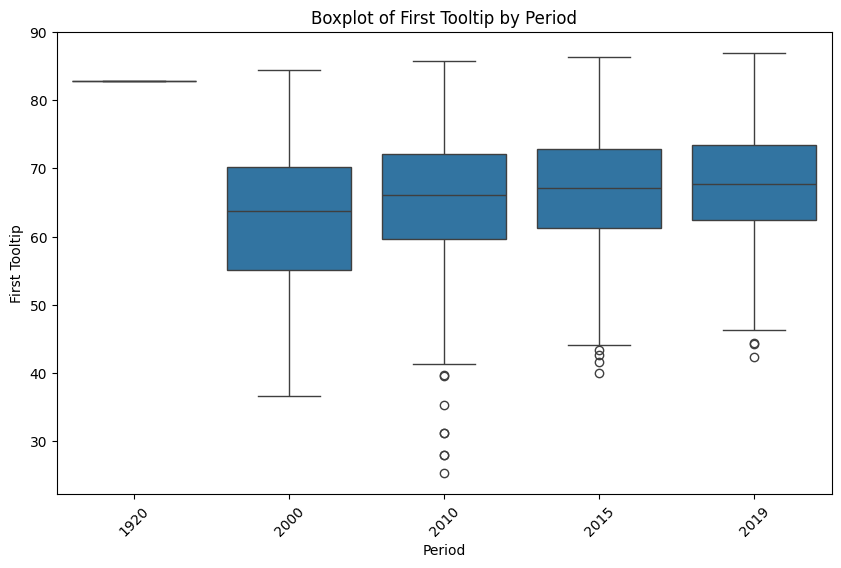

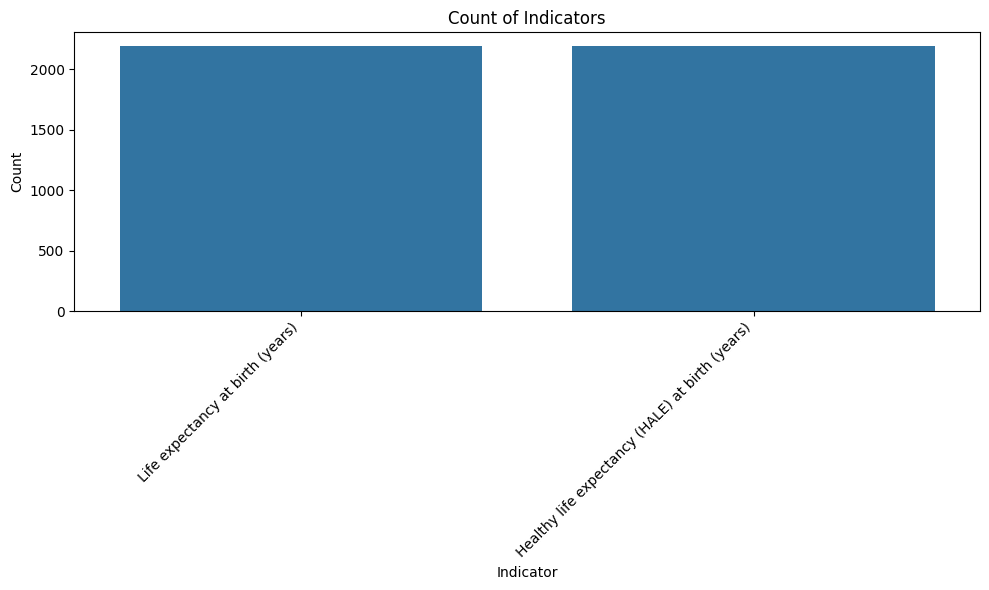

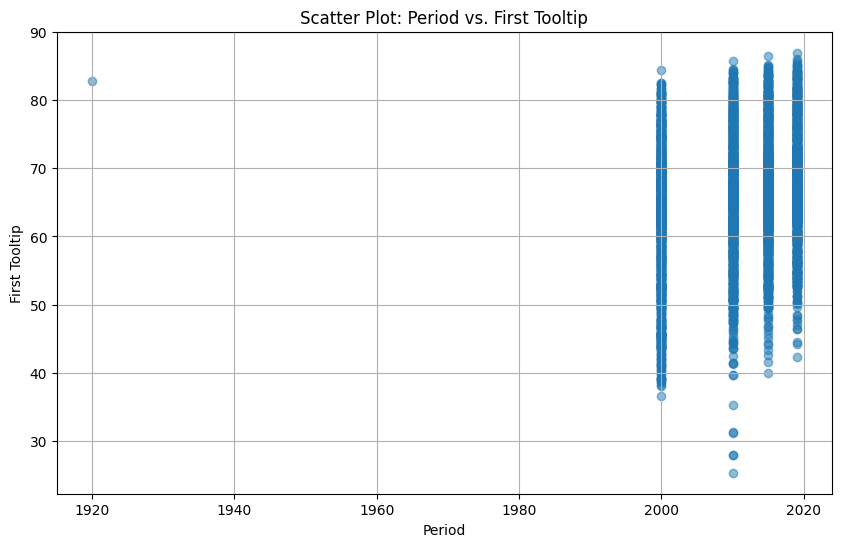

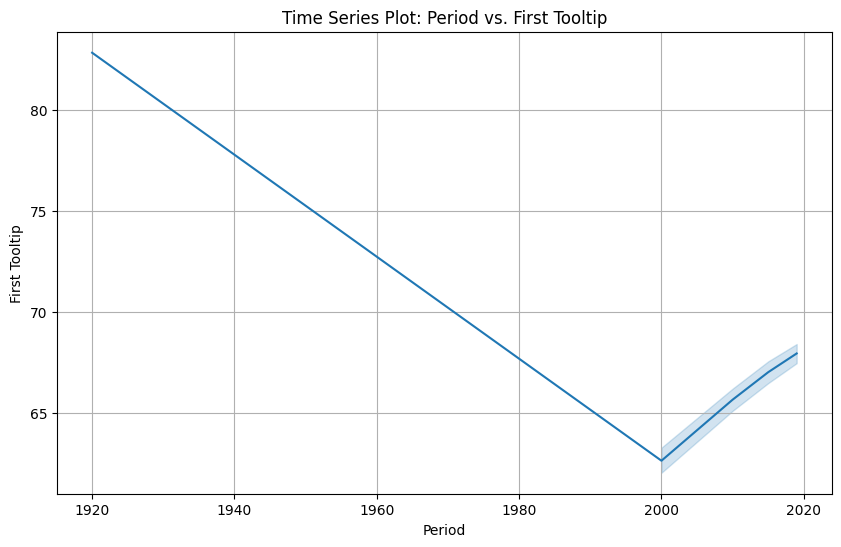

In [24]:
# Histogram for Period
plt.figure(figsize=(10, 6))
plt.hist(merged_life_expectancy['Period'], bins=20, color='skyblue')
plt.xlabel('Period')
plt.ylabel('Frequency')
plt.title('Distribution of Period')
plt.grid(True)
plt.show()

# Histogram for First Tooltip
plt.figure(figsize=(10, 6))
plt.hist(merged_life_expectancy['First Tooltip'], bins=20, color='lightgreen')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)
plt.show()

# Box plot for "First Tooltip" grouped by "Period"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='First Tooltip', data=merged_life_expectancy)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)
plt.show()

# Bar plot for "Indicator" frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='Indicator', data=merged_life_expectancy)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Scatter plot for "Period" vs "First Tooltip"
plt.figure(figsize=(10, 6))
plt.scatter(merged_life_expectancy['Period'], merged_life_expectancy['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')
plt.grid(True)
plt.show()

# Line plot for "Period" vs "First Tooltip" as a time series
plt.figure(figsize=(10, 6))
sns.lineplot(x='Period', y='First Tooltip', data=merged_life_expectancy)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Time Series Plot: Period vs. First Tooltip')
plt.grid(True)
plt.show()





**The first two histograms visualise the frequency distributions of Period and First Tooltip showing Tooltip to be most frequent around 70 and Period around 2019. <br> 
The Boxplot shows possible outliers around 2010 while in 1920 negligible data. <br>
The Scatter plot shows stacked values meaning there are duplicate rows in periods; however, these duplicates have different first tooltips, due to same indicator. Indicator is important for comparison with the rest of the datasets. <br>
The final plot shows a sharp decrease from 1920 till 2000 then starts increasing.**

In [25]:
# The column for which want to detect outliers
data_column = 'First Tooltip'

# Calculate the first and third quartiles (25th and 75th percentiles)
Q1 = merged_life_expectancy[data_column].quantile(0.25)
Q3 = merged_life_expectancy[data_column].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers_df = merged_life_expectancy[
    (merged_life_expectancy[data_column] < (Q1 - outlier_step)) |
    (merged_life_expectancy[data_column] > (Q3 + outlier_step))
]

# Print or further analyze the outliers
print("Number of outliers:", len(outliers_df))
print(outliers_df)


Number of outliers: 40
                      Location  Period  \
322                    Burundi    2000   
859                      Haiti    2010   
860                      Haiti    2010   
861                      Haiti    2010   
2243                    Angola    2000   
2458                  Botswana    2000   
2459                  Botswana    2000   
2460                  Botswana    2000   
2518                   Burundi    2000   
2519                   Burundi    2000   
2520                   Burundi    2000   
2576  Central African Republic    2010   
2578  Central African Republic    2000   
2579  Central African Republic    2000   
2580  Central African Republic    2000   
2863                  Eswatini    2010   
2864                  Eswatini    2010   
2866                  Eswatini    2000   
2867                  Eswatini    2000   
3055                     Haiti    2010   
3056                     Haiti    2010   
3057                     Haiti    2010   
3316       

**40 rows of outliers observed in various countries like Burundi, Haiti, Angola, Botswana, Central African Republic, Eswatini, Lesotho, Malawi, Rwanda, Sierra Leone, Uganda, Zambia, and Zimbabwe.<br>
This distribution across different regions suggests that life expectancy outliers are not confined to specific geographic areas. <br>
Explore outlier clusters or patterns across different dimensions (e.g., geographic regions, demographic groups) to uncover meaningful insights into factors affecting life expectancy and health outcomes.**

### Region Expectancy

In [26]:
if merged_region_expectancy is not None:
    print("Merged Region Expectancy Data:")
    print(merged_region_expectancy.head())

Merged Region Expectancy Data:
  Location  Period                         Indicator        Dim1  \
0   Africa    2019  Life expectancy at birth (years)  Both sexes   
1   Africa    2019  Life expectancy at birth (years)        Male   
2   Africa    2019  Life expectancy at birth (years)      Female   
3   Africa    2015  Life expectancy at birth (years)  Both sexes   
4   Africa    2015  Life expectancy at birth (years)        Male   

   First Tooltip  Hale Expectency  Life expectany  Unnamed: 6  \
0          64.49              NaN             NaN         NaN   
1          62.37              NaN             NaN         NaN   
2          66.65              NaN             NaN         NaN   
3          62.56              NaN             NaN         NaN   
4          60.47              NaN             NaN         NaN   

   % OF HALE in life expectancy  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  

 **The dataset includes columns such as Location (region), Period (year), Indicator (life expectancy metric), Dim1 (gender), and First Tooltip (life expectancy value). <br>
 Dim1, Unnamed:6 are irrelevant. <br>
 Must deal with null values.**
 

In [27]:
merged_region_expectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Life expectancy at birth (years),Both sexes,64.49,NaN,NaN,NaN,NaN
1,Africa,2019,Life expectancy at birth (years),Male,62.37,NaN,NaN,NaN,NaN
2,Africa,2019,Life expectancy at birth (years),Female,66.65,NaN,NaN,NaN,NaN
3,Africa,2015,Life expectancy at birth (years),Both sexes,62.56,NaN,NaN,NaN,NaN
4,Africa,2015,Life expectancy at birth (years),Male,60.47,NaN,NaN,NaN,NaN


In [28]:
# Check the columns before dropping
print("Columns before dropping:")
print(merged_region_expectancy.columns)

# Drop the 'Unnamed: 6' and dim1  column
merged_region_expectancy.drop(columns=['Unnamed: 6', 'Dim1'], inplace=True)

 #Check the columns after dropping
print("\nColumns after dropping :")
print(merged_region_expectancy.columns)

Columns before dropping:
Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip',
       'Hale Expectency', 'Life expectany', 'Unnamed: 6',
       '% OF HALE in life expectancy'],
      dtype='object')

Columns after dropping :
Index(['Location', 'Period', 'Indicator', 'First Tooltip', 'Hale Expectency',
       'Life expectany', '% OF HALE in life expectancy'],
      dtype='object')


In [29]:
print(merged_region_expectancy.head)

<bound method NDFrame.head of             Location  Period                                        Indicator  \
0             Africa    2019                 Life expectancy at birth (years)   
1             Africa    2019                 Life expectancy at birth (years)   
2             Africa    2019                 Life expectancy at birth (years)   
3             Africa    2015                 Life expectancy at birth (years)   
4             Africa    2015                 Life expectancy at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)  

In [30]:
print(merged_region_expectancy.dtypes)

Location                         object
Period                            int64
Indicator                        object
First Tooltip                   float64
Hale Expectency                 float64
Life expectany                  float64
% OF HALE in life expectancy    float64
dtype: object


In [31]:
merged_region_expectancy.describe()

,Period,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
count,216.000000,72.000000,144.000000,144.000000,144.000000
mean,2011.000000,70.556806,61.403333,70.556806,87.013889
std,7.122842,6.880156,5.961208,6.856057,1.404220
min,2000.000000,51.060000,45.030000,51.060000,85.000000
25%,2007.500000,66.585000,57.870000,66.585000,86.000000
50%,2012.500000,71.375000,61.665000,71.375000,87.000000
75%,2016.000000,75.525000,66.360000,75.525000,88.000000
max,2019.000000,81.290000,70.240000,81.290000,90.000000


**Since there are null values, will deal with them using imputation instead of drop because they are important to our analysis. <br>
Mean,median, or mode are used but here will use median since the NAs are in continuous variables.<br>
Mean is used in imputation when normally distributed without outliers.<br>
Median when missing values are in continuous variables(float) with skewness and robust to outliers.<br>
Mode when in categorical or discrete variables.**

In [32]:
# Calculate the medians
median_tooltip = 71.375
median_hale = 61.665
median_life = 71.375
median_hale_pct = 87.0

# Fill missing values with medians
merged_region_expectancy['First Tooltip'].fillna(median_tooltip, inplace=True)
merged_region_expectancy['Hale Expectency'].fillna(median_hale, inplace=True)
merged_region_expectancy['Life expectany'].fillna(median_life, inplace=True)
merged_region_expectancy['% OF HALE in life expectancy'].fillna(median_hale_pct, inplace=True)

# Verify that missing values are filled
print(merged_region_expectancy.isnull().sum())


Location                        0
Period                          0
Indicator                       0
First Tooltip                   0
Hale Expectency                 0
Life expectany                  0
% OF HALE in life expectancy    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13376\2018587319.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_region_expectancy['First Tooltip'].fillna(median_tooltip, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13376\2018587319.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [33]:
merged_region_expectancy.head()

,Location,Period,Indicator,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
0,Africa,2019,Life expectancy at birth (years),64.49,61.665,71.375,87.0
1,Africa,2019,Life expectancy at birth (years),62.37,61.665,71.375,87.0
2,Africa,2019,Life expectancy at birth (years),66.65,61.665,71.375,87.0
3,Africa,2015,Life expectancy at birth (years),62.56,61.665,71.375,87.0
4,Africa,2015,Life expectancy at birth (years),60.47,61.665,71.375,87.0


#### Check for Duplicate Rows

In [34]:
duplicate_rows = merged_region_expectancy[merged_region_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
            Location  Period                                        Indicator  \
144           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
145           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
146           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
147           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
148           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   

     First 

In [35]:
# Aggregate duplicates by taking the mean
merged_region_expectancy = merged_region_expectancy.groupby(['Location', 'Period', 'Indicator']).mean().reset_index()

# Print the aggregated dataframe
merged_region_expectancy.head()

,Location,Period,Indicator,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
0,Africa,2000,Healthy life expectancy (HALE) at birth (years),71.375000,45.816667,52.673333,87.0
1,Africa,2000,Life expectancy at birth (years),52.673333,61.665000,71.375000,87.0
2,Africa,2010,Healthy life expectancy (HALE) at birth (years),71.375000,51.803333,59.496667,87.0
3,Africa,2010,Life expectancy at birth (years),59.496667,61.665000,71.375000,87.0
4,Africa,2015,Healthy life expectancy (HALE) at birth (years),71.375000,54.423333,62.573333,87.0


**The columns you are aggregating ("First Tooltip," "Hale Expectancy," etc.) are numerical, continuous variables.<br>
Taking the mean of these values is a standard method to summarize such data, especially when dealing with measurements over time or across regions. <br>
Removed the duplicates to avoid redundancy and reduce dimensionality.**

In [36]:
duplicate_rows = merged_region_expectancy[merged_region_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [37]:
merged_region_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      48 non-null     object 
 1   Period                        48 non-null     int64  
 2   Indicator                     48 non-null     object 
 3   First Tooltip                 48 non-null     float64
 4   Hale Expectency               48 non-null     float64
 5   Life expectany                48 non-null     float64
 6   % OF HALE in life expectancy  48 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


In [38]:
merged_region_expectancy.describe()

,Period,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2011.000000,70.965903,61.534167,70.965903,87.006944
std,7.181537,4.672760,4.175491,4.672760,0.624517
min,2000.000000,52.673333,45.816667,52.673333,86.000000
25%,2007.500000,71.375000,61.615417,71.375000,87.000000
50%,2012.500000,71.375000,61.665000,71.375000,87.000000
75%,2016.000000,71.734167,62.165417,71.734167,87.000000
max,2019.000000,78.206667,68.616667,78.206667,88.666667


#### Visualizations

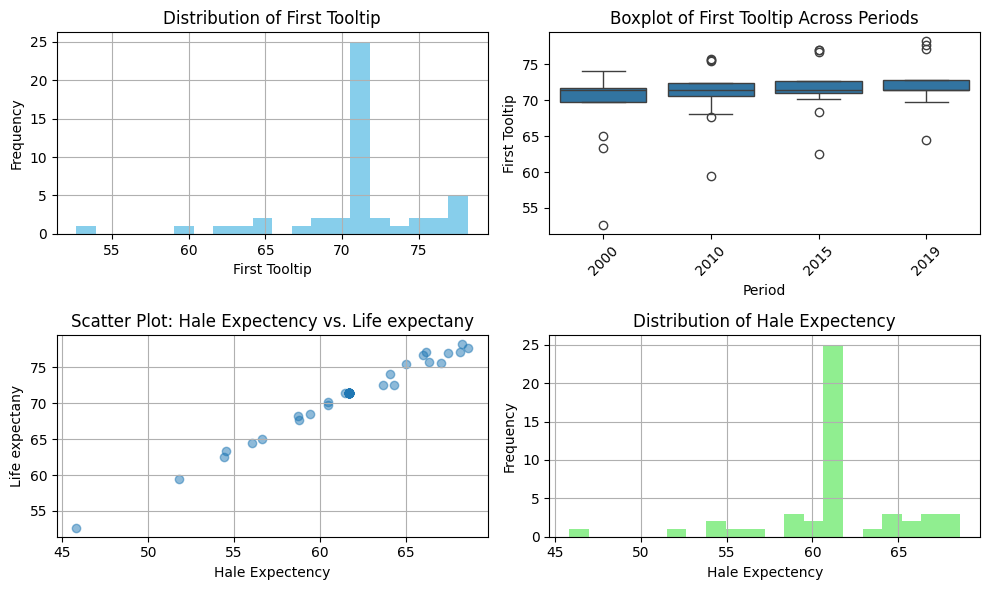

In [39]:
plt.figure(figsize=(10, 6))

# Histogram for First Tooltip
plt.subplot(2, 2, 1)
plt.hist(merged_region_expectancy['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)

# Boxplot for 'First Tooltip' Across Periods
plt.subplot(2, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_region_expectancy)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip Across Periods')
plt.xticks(rotation=45)

# Scatterplot for 'Hale Expectency' vs 'Life expectany'
plt.subplot(2, 2, 3)
plt.scatter(merged_region_expectancy['Hale Expectency'], merged_region_expectancy['Life expectany'], alpha=0.5)
plt.xlabel('Hale Expectency')
plt.ylabel('Life expectany')
plt.title('Scatter Plot: Hale Expectency vs. Life expectany')
plt.grid(True)

# Histogram for 'Hale Expectency'
plt.subplot(2, 2, 4)
plt.hist(merged_region_expectancy['Hale Expectency'], bins=20, color='lightgreen')
plt.xlabel('Hale Expectency')
plt.ylabel('Frequency')
plt.title('Distribution of Hale Expectency')
plt.grid(True)

plt.tight_layout()
plt.show()

**The boxplots show that there are minimal outliers which do not seem to affect. <br>
The scatter plot shows the almost direct relationship, in which as Hale Expectency increases Life expectany increases.<br>
First Tooltip in merged_region_expectancy is highest around 72.**

### Merged Health Services

In [40]:
if merged_health_services is not None:
    print("Merged Health Services Data:")
    print(merged_health_services.head())

Merged Health Services Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Population using at least basic drinking-water...   
1  Afghanistan    2016  Population using at least basic drinking-water...   
2  Afghanistan    2015  Population using at least basic drinking-water...   
3  Afghanistan    2014  Population using at least basic drinking-water...   
4  Afghanistan    2013  Population using at least basic drinking-water...   

   First Tooltip Dim1  
0          57.32  NaN  
1          54.84  NaN  
2          52.39  NaN  
3          49.96  NaN  
4          47.56  NaN  


In [41]:
print(merged_health_services.dtypes)

Location          object
Period             int64
Indicator         object
First Tooltip    float64
Dim1              object
dtype: object


**Location: Geographical location of data collection (e.g., countries or regions).<br>
Period: Time period or year of data recording, providing a temporal context.<br>
Indicator: Specific health metric measured (e.g., "Population using at least basic drinking-water services").<br>
First Tooltip: Numerical value or percentage related to health services.<br>
Dim1 is irrelevant and encoding must be done to categorical variables.**

In [42]:
#location, indicator, dim1 are categorical variables
merged_health_services.describe()

,Period,First Tooltip
count,20959.000000,20959.000000
mean,2008.994275,68.297133
std,5.129152,31.351259
min,2000.000000,0.000000
25%,2005.000000,41.675000
50%,2009.000000,80.950000
75%,2013.000000,96.800000
max,2019.000000,100.000000


In [43]:
# Print the columns in your DataFrame
print(merged_health_services.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_health_services.columns:
    # Drop the 'Dim1' column
    merged_health_services.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_health_services.head()

Index(['Location', 'Period', 'Indicator', 'First Tooltip', 'Dim1'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


In [44]:
# Check for missing values 
missing_values_merged_health_services = merged_health_services.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_health_services)

       Location  Period  Indicator  First Tooltip
0         False   False      False          False
1         False   False      False          False
2         False   False      False          False
3         False   False      False          False
4         False   False      False          False
...         ...     ...        ...            ...
20954     False   False      False          False
20955     False   False      False          False
20956     False   False      False          False
20957     False   False      False          False
20958     False   False      False          False

[20959 rows x 4 columns]


In [45]:
merged_health_services.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


#### Check for Duplicate Rows

In [46]:
duplicate_rows = merged_health_services[merged_health_services.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
           Location  Period  \
3618        Andorra    2017   
3619        Andorra    2017   
3621        Andorra    2016   
3622        Andorra    2016   
3624        Andorra    2015   
...             ...     ...   
15871     Singapore    2001   
15873     Singapore    2000   
15957         Spain    2014   
18941  Turkmenistan    2017   
18942  Turkmenistan    2017   

                                               Indicator  First Tooltip  
3618   Population using at least basic sanitation ser...         100.00  
3619   Population using at least basic sanitation ser...         100.00  
3621   Population using at least basic sanitation ser...         100.00  
3622   Population using at least basic sanitation ser...         100.00  
3624   Population using at least basic sanitation ser...         100.00  
...                                                  ...            ...  
15871  Population using safely managed sanitation ser...         100.00  
15873  Population u

In [47]:
# Merge duplicate rows by calculating the mean for numerical columns
merged_health_services = merged_health_services.groupby(['Location', 'Period', 'Indicator']).mean().reset_index()

# Display the first few rows of the merged DataFrame
merged_health_services.head()



,Location,Period,Indicator,First Tooltip
0,Afghanistan,2000,Population using at least basic drinking-water...,21.62
1,Afghanistan,2000,Population using at least basic sanitation ser...,24.97
2,Afghanistan,2001,Population using at least basic drinking-water...,21.62
3,Afghanistan,2001,Population using at least basic sanitation ser...,24.97
4,Afghanistan,2002,Population using at least basic drinking-water...,23.60


**Merged them since the duplicates have similarities in period location and indicators. <br>
Used the mean for merging  to retain the overall trends and patterns since 'First Tooltip' appears to represent some measure without losing significant information.**

In [48]:
duplicate_rows = merged_health_services[merged_health_services.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Visualizations 

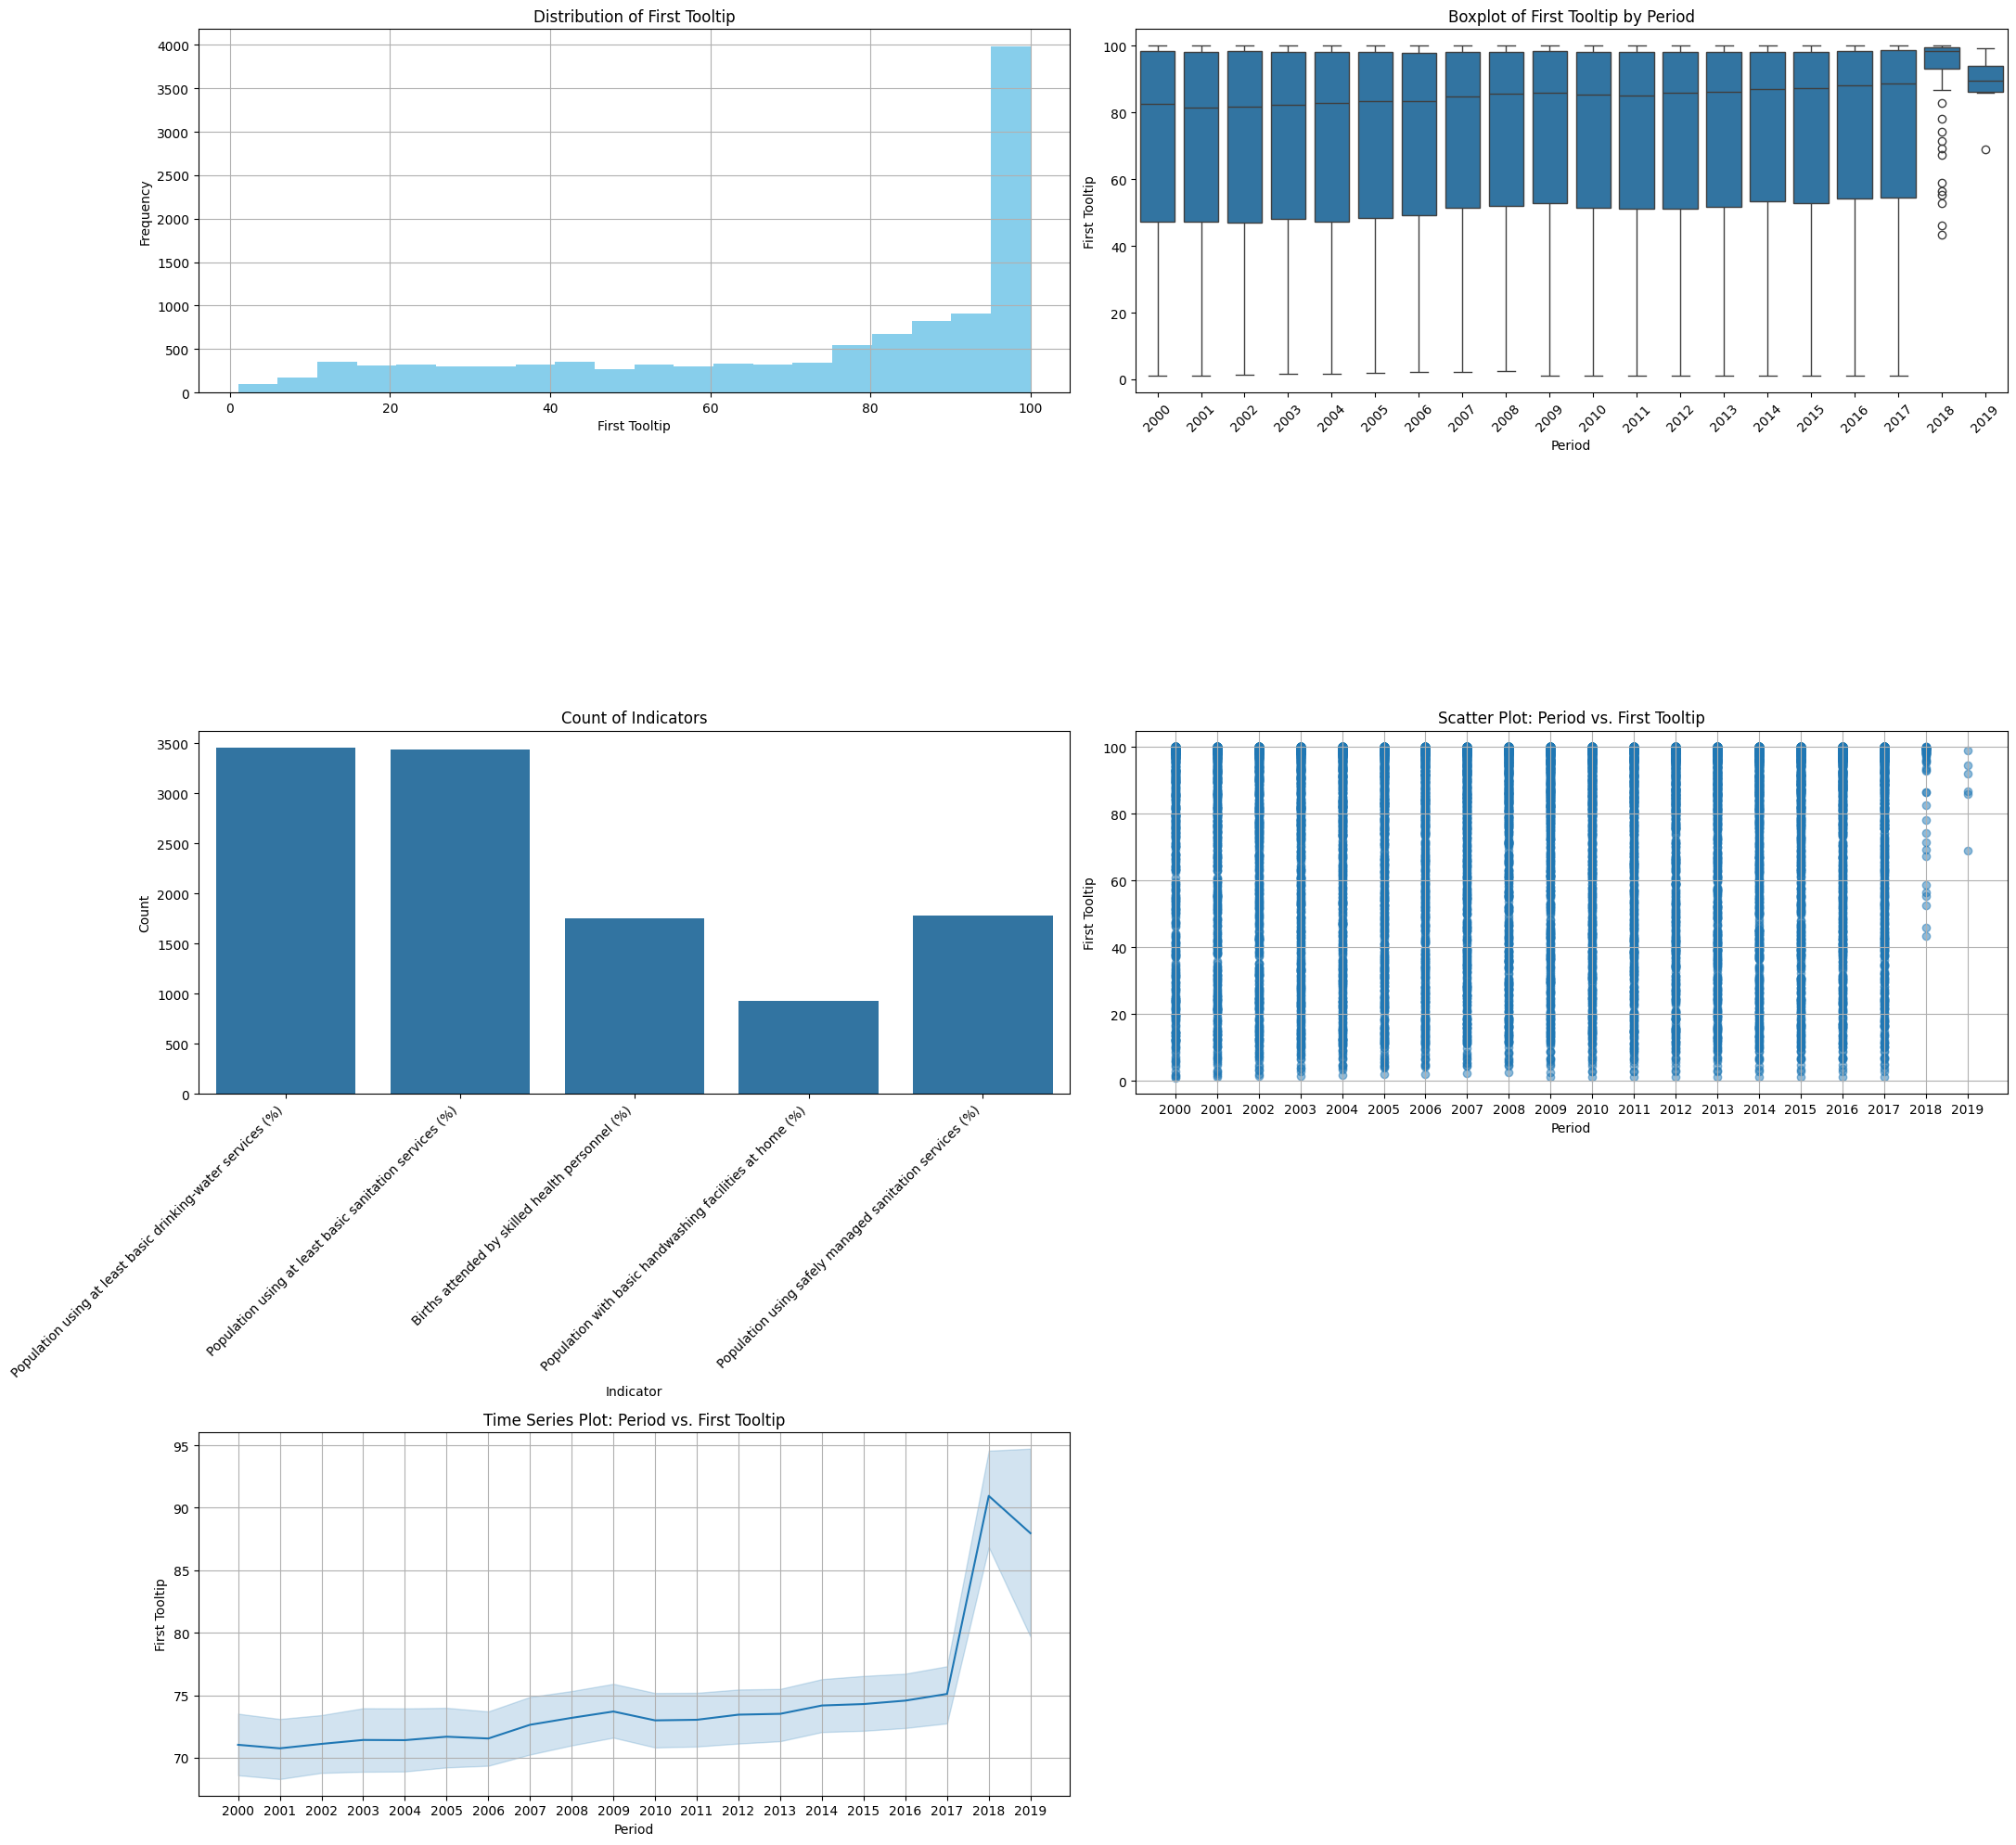

In [49]:
plt.figure(figsize=(22, 20))  

# Histogram for First Tooltip
plt.subplot(3, 2, 1)
plt.hist(merged_health_services['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)

# Box plot for "First Tooltip" grouped by "Period"
plt.subplot(3, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_health_services)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for "Indicator" frequencies
plt.subplot(3, 2, 3)
sns.countplot(x='Indicator', data=merged_health_services)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for "Period" vs "First Tooltip"
plt.subplot(3, 2, 4)
plt.scatter(merged_health_services['Period'].astype(str), merged_health_services['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')
plt.grid(True)

# Line plot for "Period" vs "First Tooltip" as a time series
plt.subplot(3, 2, 5)
sns.lineplot(x=merged_health_services['Period'].astype(str), y='First Tooltip', data=merged_health_services)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Time Series Plot: Period vs. First Tooltip')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


**The bar plot show highest distribution around 90. <br>
Again, the boxplots in merged_health_services don't show much outliers except in 2018 and 2019. <br>
Also there is more variability in the first 25% of the range. As well as increasing median. <br>
The scatter plot shows a positive trend between "Period" and "First Tooltip". This means later periods tend to have higher "First Tooltip" values. 2018 and2019 have fewer observations. <br>
The line plot shows a general increase of Fisrt Tooltip as time increases but at 2018 it starts to decrease.**

### Merged Disease Incidence

In [50]:
if merged_disease_incidence is not None:
    print("Merged Disease Incidence Data:")
    print(merged_disease_incidence.head())

Merged Disease Incidence Data:
      Location                                          Indicator  Period  \
0  Afghanistan  Reported number of people requiring interventi...    2018   
1  Afghanistan  Reported number of people requiring interventi...    2017   
2  Afghanistan  Reported number of people requiring interventi...    2016   
3  Afghanistan  Reported number of people requiring interventi...    2015   
4  Afghanistan  Reported number of people requiring interventi...    2014   

  First Tooltip Dim1  
0      14834701  NaN  
1      14786722  NaN  
2      13275429  NaN  
3      13765392  NaN  
4      13384908  NaN  


In [51]:
# Function to extract numeric values from strings
def extract_numeric(value):
    if isinstance(value, str):
        numeric_part = re.match(r'(\d+)', value)
        if numeric_part:
            return int(numeric_part.group())
    return None

# Function to extract numeric values from range strings
def extract_numeric_range(value):
    if isinstance(value, str):
        numeric_part = re.match(r'(\d+)\s*\[\d+-\d+\]', value)
        if numeric_part:
            return int(numeric_part.group(1))
    return None

# Function to merge CSV files
def merge_csv_files(files):
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            # Apply extraction logic based on file paths
            if "interventionAgianstNTDs" in file:
                df['First Tooltip'] = df['First Tooltip'].astype(int)  # Direct numeric values
            elif "incedenceOfMalaria" in file or "incedenceOfTuberculosis" in file:
                df['First Tooltip'] = df['First Tooltip'].apply(extract_numeric_range)  # Range format
            else:
                df['First Tooltip'] = df['First Tooltip'].apply(extract_numeric)  # Regular numeric format
            dfs.append(df)
        else:
            print(f"File '{file}' not found.")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        return merged_df
    else:
        return None

# Disease incidence files
disease_incidence_files = ["interventionAgianstNTDs.csv", "incedenceOfMalaria.csv",
                           "incedenceOfTuberculosis.csv", "hepatitusBsurfaceAntigen.csv",
                           "newHivInfections.csv"]

# Example usage
merged_disease_incidence = merge_csv_files(disease_incidence_files)



C:\Users\user\AppData\Local\Temp\ipykernel_13376\2408750484.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dfs, ignore_index=True)


**This code was done because some of the paths consisted of ranges in First Tooltip while others only numbers
So to combine them and convert it into float correctly this was done.**

In [52]:
# Print the columns in your DataFrame
print(merged_disease_incidence.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_disease_incidence.columns:
    # Drop the 'Dim1' column
    merged_disease_incidence.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_disease_incidence.head()

Index(['Location', 'Indicator', 'Period', 'First Tooltip', 'Dim1'], dtype='object')


,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701.0
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722.0
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429.0
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392.0
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908.0


**Location: Represents the geographical location or country where the data was collected.<br>
Indicator: Describes the specific metric or category being measured. <br>
Period: Indicates the year when the data was recorded. <br>
First Tooltip: Refers to the actual reported number of people requiring intervention corresponding to the location, indicator, and period.<br>
These columns together provide information about the reported numbers of people requiring intervention across different locations and years, with the indicator specifying the type of intervention or metric being measured.**

In [53]:
merged_disease_incidence.describe()

,Period,First Tooltip
count,10380.000000,6.708000e+03
mean,2010.349229,2.559728e+06
std,5.829804,2.884712e+07
min,2000.000000,0.000000e+00
25%,2005.000000,1.000000e+00
50%,2011.000000,4.600000e+01
75%,2015.000000,3.270000e+02
max,2019.000000,8.460000e+08


In [54]:
print(merged_disease_incidence.dtypes)

Location          object
Indicator         object
Period             int64
First Tooltip    float64
dtype: object


In [55]:
merged_disease_incidence.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701.0
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722.0
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429.0
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392.0
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908.0


**The weird numbers are due to the large values found in NTDs csv file.**

In [56]:
# Check for missing values 
missing_values_merged_disease_incidence = merged_disease_incidence.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_disease_incidence)


       Location  Indicator  Period  First Tooltip
0         False      False   False          False
1         False      False   False          False
2         False      False   False          False
3         False      False   False          False
4         False      False   False          False
...         ...        ...     ...            ...
10375     False      False   False          False
10376     False      False   False          False
10377     False      False   False          False
10378     False      False   False          False
10379     False      False   False          False

[10380 rows x 4 columns]


#### Check for Duplicate Rows

In [57]:
duplicate_rows = merged_disease_incidence[merged_disease_incidence.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
          Location                                          Indicator  Period  \
7831   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7832   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7834   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7835   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7837   Afghanistan  New HIV infections (per 1000 uninfected popula...    2010   
...            ...                                                ...     ...   
10355       Zambia  New HIV infections (per 1000 uninfected popula...    2015   
10358       Zambia  New HIV infections (per 1000 uninfected popula...    2010   
10366     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2019   
10369     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2015   
10376     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2005   

       Firs

In [58]:
# Aggregate duplicates by taking the mean
merged_disease_incidence = merged_disease_incidence.groupby(['Location', 'Period', 'Indicator']).mean().reset_index()

# Print the aggregated dataframe
print(merged_disease_incidence.head())
#groupby(['Location', 'Period', 'Indicator']).mean() groups the DataFrame by the specified columns and calculates the mean for numerical columns in each group.
#.reset_index() resets the index of the DataFrame after aggregation.

      Location  Period                                          Indicator  \
0  Afghanistan    2000  Incidence of tuberculosis (per 100 000 populat...   
1  Afghanistan    2000   Malaria incidence (per 1 000 population at risk)   
2  Afghanistan    2000  New HIV infections (per 1000 uninfected popula...   
3  Afghanistan    2001  Incidence of tuberculosis (per 100 000 populat...   
4  Afghanistan    2001   Malaria incidence (per 1 000 population at risk)   

   First Tooltip  
0          190.0  
1            NaN  
2            0.0  
3          189.0  
4            NaN  


In [59]:
duplicate_rows = merged_disease_incidence[merged_disease_incidence.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Visualizations

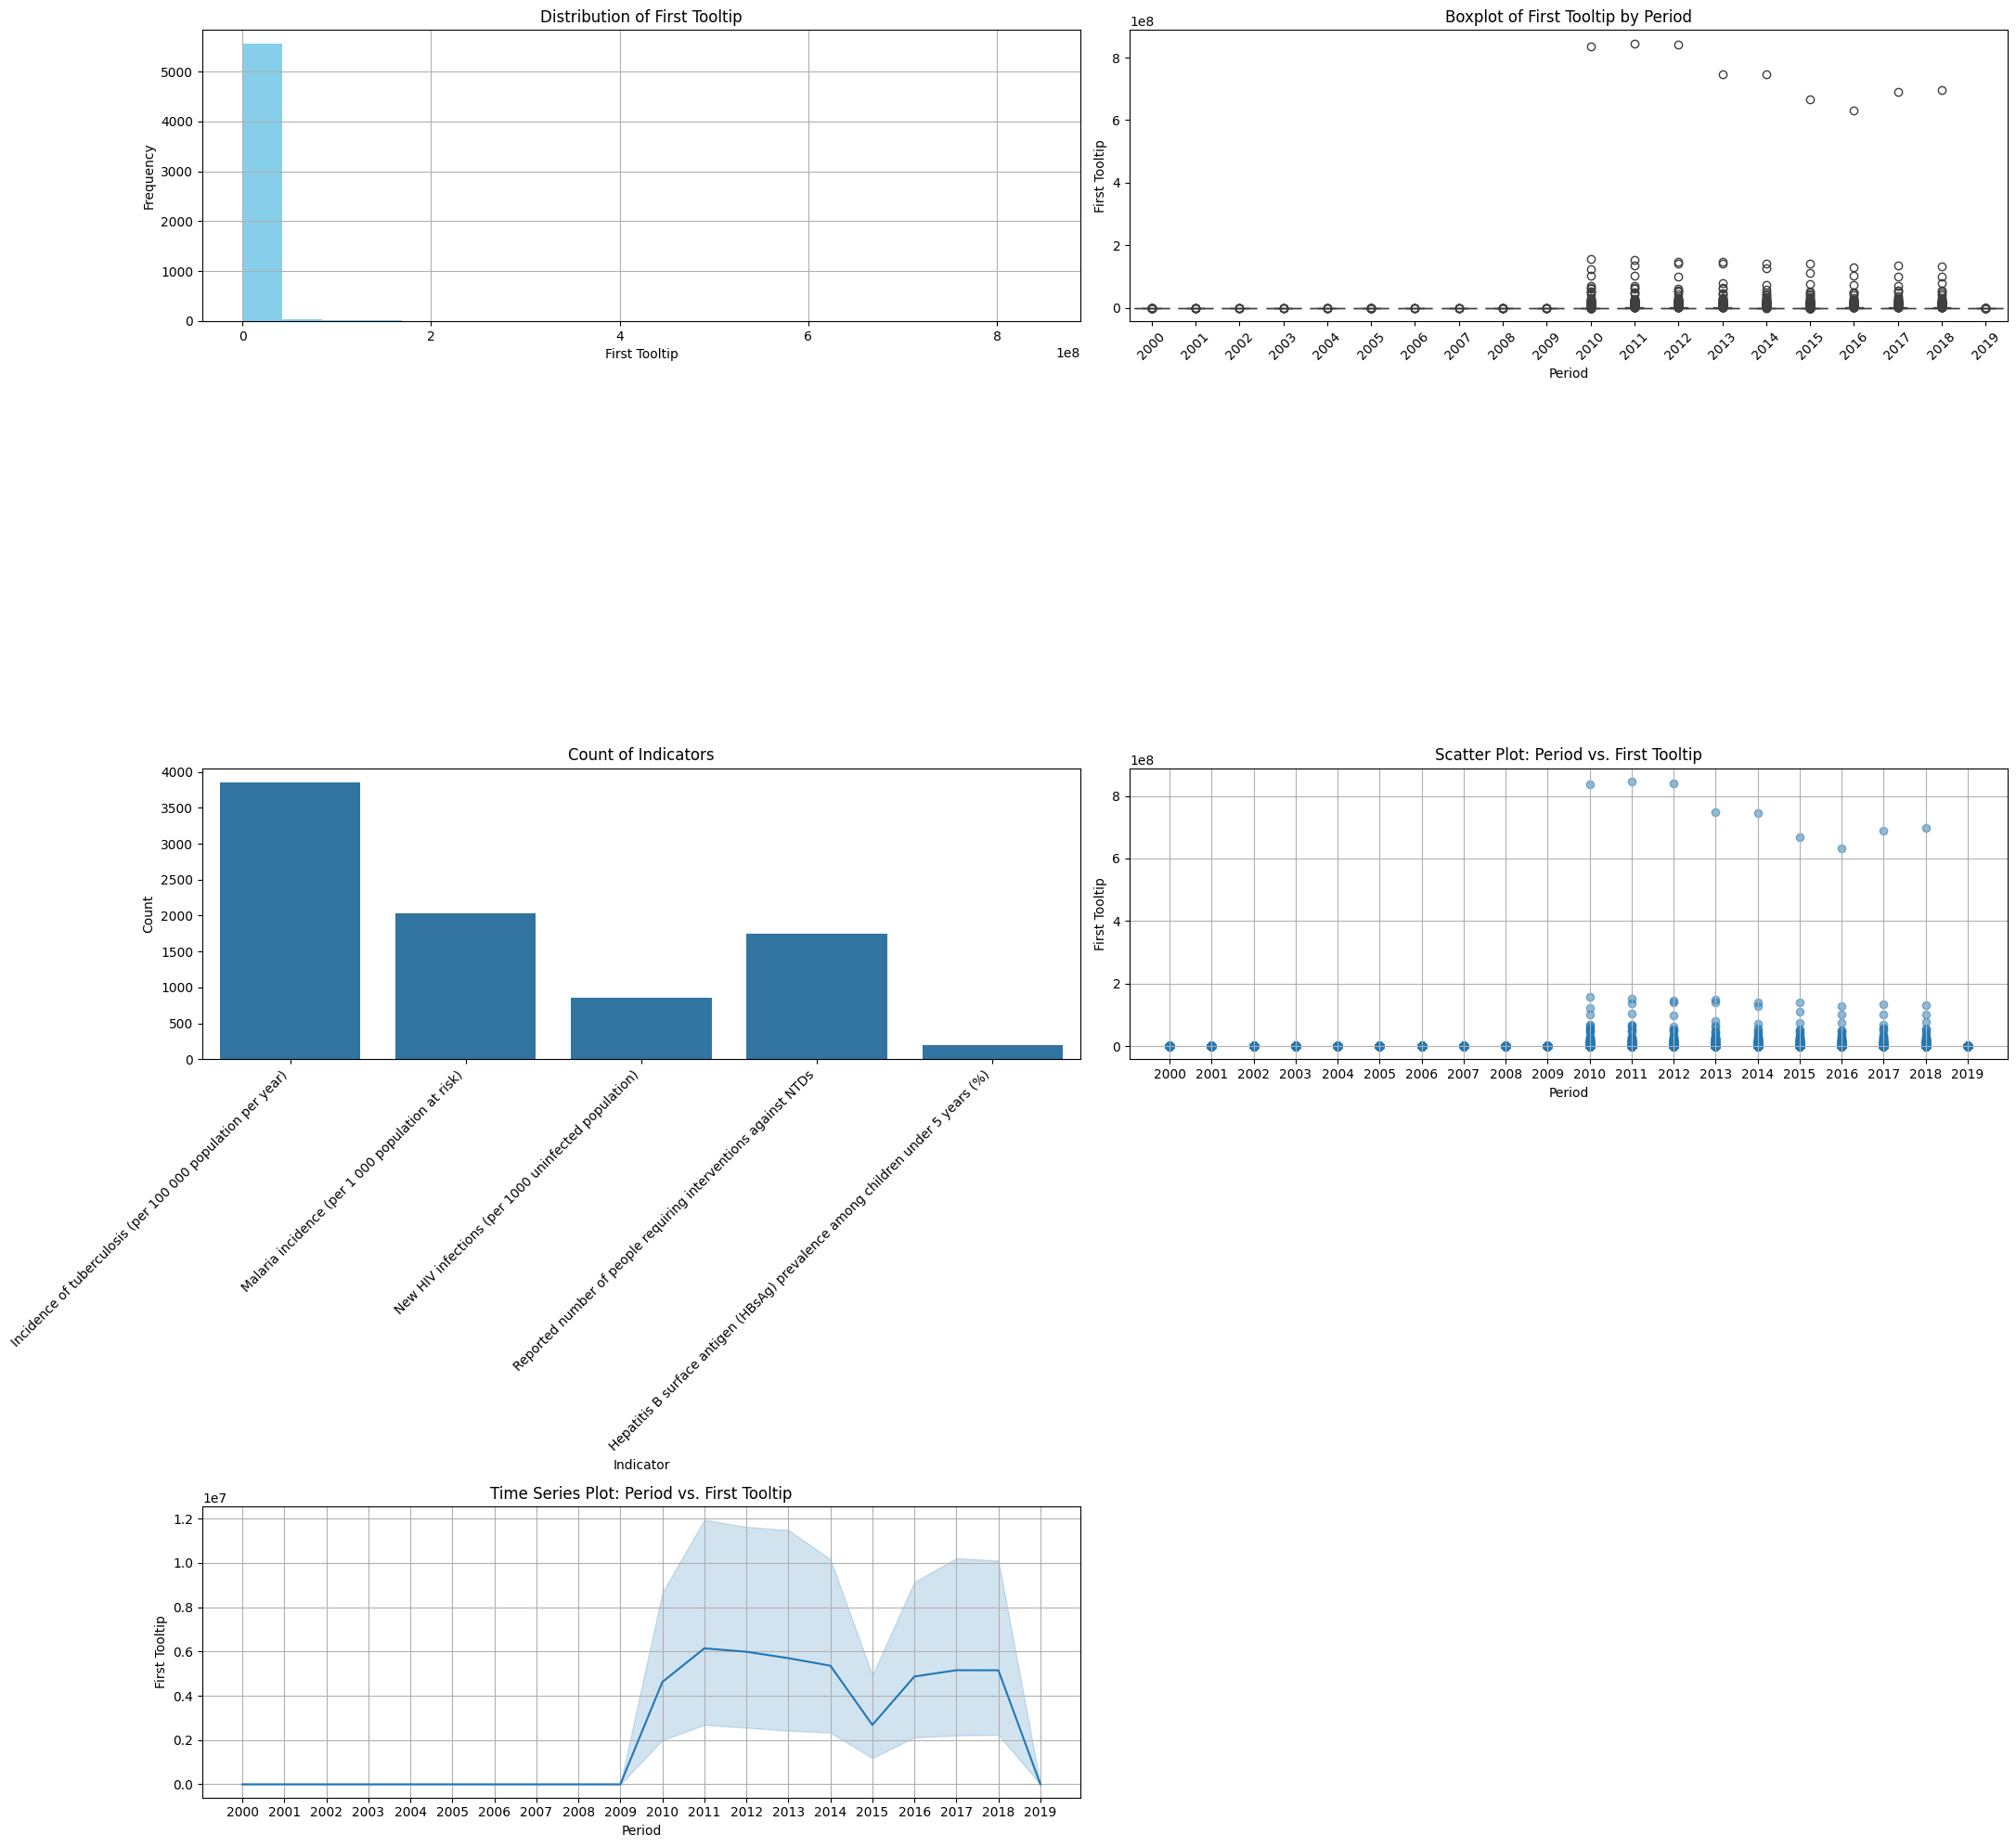

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 20))  

# Histogram for First Tooltip
plt.subplot(3, 2, 1)
plt.hist(merged_disease_incidence['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)

# Box plot for "First Tooltip" grouped by "Period"
plt.subplot(3, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_disease_incidence)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for "Indicator" frequencies
plt.subplot(3, 2, 3)
sns.countplot(x='Indicator', data=merged_disease_incidence)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for "Period" vs "First Tooltip"
plt.subplot(3, 2, 4)
plt.scatter(merged_disease_incidence['Period'].astype(str), merged_disease_incidence['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')
plt.grid(True)

# Line plot for "Period" vs "First Tooltip" as a time series
plt.subplot(3, 2, 5)
sns.lineplot(x=merged_disease_incidence['Period'].astype(str), y='First Tooltip', data=merged_disease_incidence)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Time Series Plot: Period vs. First Tooltip')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [61]:
# Calculate quartiles and IQR
Q1 = merged_disease_incidence['First Tooltip'].quantile(0.25)
Q3 = merged_disease_incidence['First Tooltip'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = merged_disease_incidence[(merged_disease_incidence['First Tooltip'] < lower_bound) | (merged_disease_incidence['First Tooltip'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
         Location  Period                                          Indicator  \
25    Afghanistan    2010  Reported number of people requiring interventi...   
28    Afghanistan    2011  Reported number of people requiring interventi...   
31    Afghanistan    2012  Reported number of people requiring interventi...   
34    Afghanistan    2013  Reported number of people requiring interventi...   
37    Afghanistan    2014  Reported number of people requiring interventi...   
...           ...     ...                                                ...   
8663     Zimbabwe    2014  Reported number of people requiring interventi...   
8668     Zimbabwe    2015  Reported number of people requiring interventi...   
8671     Zimbabwe    2016  Reported number of people requiring interventi...   
8674     Zimbabwe    2017  Reported number of people requiring interventi...   
8677     Zimbabwe    2018  Reported number of people requiring interventi...   

      First Tooltip  
25     



**The Boxplots show great number of outliers, and after printing number of outliers= 1132 rows.<br>
However the NTDs file consists of huge values of First Tooltip compared to the rest, thus the great number of outliers. <br>
NTDs is important for our analysis, so further measures might be needed. <br>
The "W" shape in a time series plot can represent seasonal or cyclical patterns, anomalies, or errors in the data which is probably due to the NTDs csv file.**


### Maternal Health

In [62]:
if merged_maternal_health is not None:
    print("Merged Maternal Health Data:")
    print(merged_maternal_health.head())

Merged Maternal Health Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Maternal mortality ratio (per 100 000 live bir...   
1  Afghanistan    2016  Maternal mortality ratio (per 100 000 live bir...   
2  Afghanistan    2015  Maternal mortality ratio (per 100 000 live bir...   
3  Afghanistan    2014  Maternal mortality ratio (per 100 000 live bir...   
4  Afghanistan    2013  Maternal mortality ratio (per 100 000 live bir...   

    First Tooltip  
0  638 [427-1010]  
1  673 [457-1040]  
2  701 [501-1020]  
3  786 [592-1080]  
4  810 [617-1080]  


In [63]:
print(merged_maternal_health.columns)

Index(['Location', 'Period', 'Indicator', 'First Tooltip'], dtype='object')


In [64]:
merged_maternal_health.describe()


,Period
count,3294.000000
mean,2008.500000
std,5.188915
min,2000.000000
25%,2004.000000
50%,2008.500000
75%,2013.000000
max,2017.000000


In [65]:
print(merged_maternal_health.dtypes)

Location         object
Period            int64
Indicator        object
First Tooltip    object
dtype: object


In [66]:
# Preprocess 'First Tooltip' column
def extract_numeric(value):
    # Extract numeric part from the string using regex
    numeric_part = re.search(r'\d+', value)
    if numeric_part:
        return float(numeric_part.group())
    else:
        return None

# Apply the extract_numeric function to 'First Tooltip' column
merged_maternal_health['First Tooltip'] = merged_maternal_health['First Tooltip'].apply(extract_numeric)

print(merged_maternal_health.dtypes)
print(merged_maternal_health.head())

Location          object
Period             int64
Indicator         object
First Tooltip    float64
dtype: object
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Maternal mortality ratio (per 100 000 live bir...   
1  Afghanistan    2016  Maternal mortality ratio (per 100 000 live bir...   
2  Afghanistan    2015  Maternal mortality ratio (per 100 000 live bir...   
3  Afghanistan    2014  Maternal mortality ratio (per 100 000 live bir...   
4  Afghanistan    2013  Maternal mortality ratio (per 100 000 live bir...   

   First Tooltip  
0          638.0  
1          673.0  
2          701.0  
3          786.0  
4          810.0  


In [67]:
# Check for missing values 
missing_values_merged_maternal_health= merged_maternal_health.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_maternal_health)

      Location  Period  Indicator  First Tooltip
0        False   False      False          False
1        False   False      False          False
2        False   False      False          False
3        False   False      False          False
4        False   False      False          False
...        ...     ...        ...            ...
3289     False   False      False          False
3290     False   False      False          False
3291     False   False      False          False
3292     False   False      False          False
3293     False   False      False          False

[3294 rows x 4 columns]


#### Check for Duplicate Rows

In [68]:
duplicate_rows = merged_maternal_health[merged_maternal_health.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [69]:
merged_maternal_health.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638.0
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673.0
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701.0
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786.0
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810.0


#### Visualizations

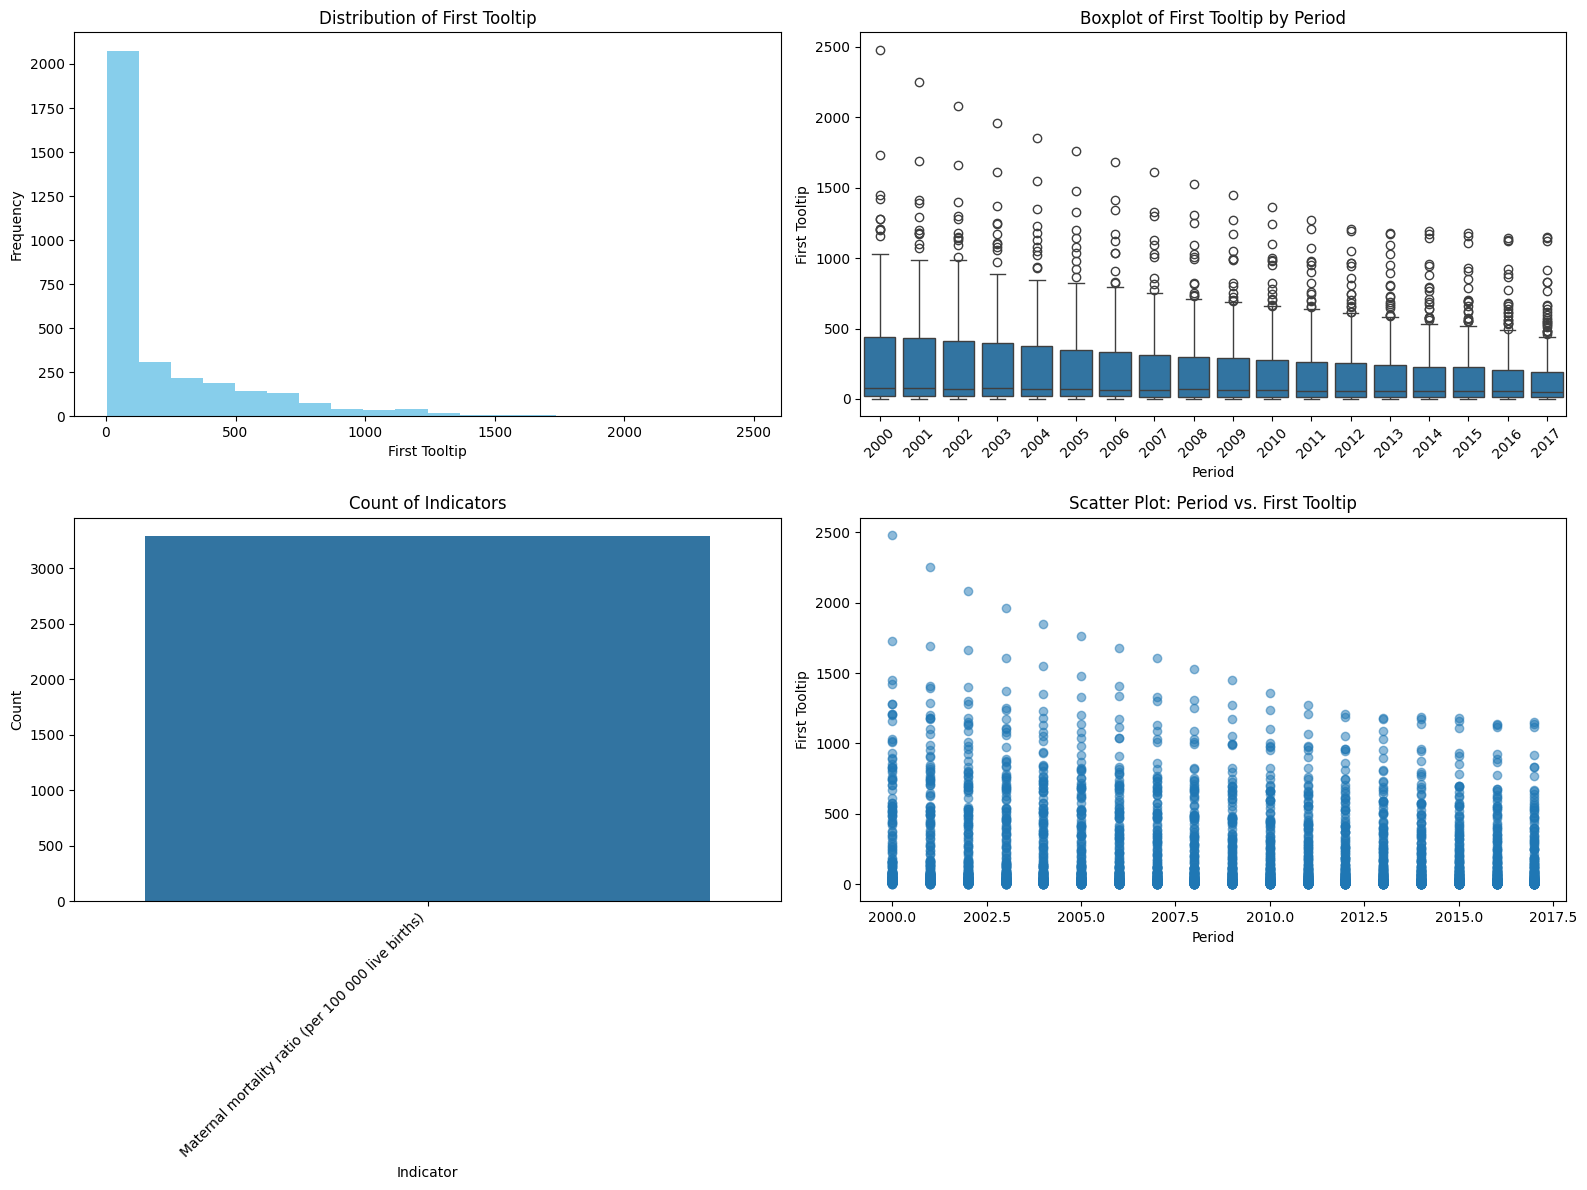

In [70]:
plt.figure(figsize=(16, 12))

# Histogram for 'First Tooltip'
plt.subplot(2, 2, 1)
plt.hist(merged_maternal_health['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')

# Box plot for 'First Tooltip' grouped by 'Period'
plt.subplot(2, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_maternal_health)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for 'Indicator' frequencies
plt.subplot(2, 2, 3)
sns.countplot(x='Indicator', data=merged_maternal_health)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for 'Period' vs 'First Tooltip'
plt.subplot(2, 2, 4)
plt.scatter(merged_maternal_health['Period'], merged_maternal_health['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')

# Adjust layout
plt.tight_layout()
plt.show()


In [71]:
# Calculate the first and third quartiles
Q1 = merged_maternal_health['First Tooltip'].quantile(0.25)
Q3 = merged_maternal_health['First Tooltip'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = merged_maternal_health[(merged_maternal_health['First Tooltip'] < lower_bound) |
                                  (merged_maternal_health['First Tooltip'] > upper_bound)]

# Print the outliers
print("Outliers in 'First Tooltip' column:")
print(outliers)


Outliers in 'First Tooltip' column:
                         Location  Period  \
3                     Afghanistan    2014   
4                     Afghanistan    2013   
5                     Afghanistan    2012   
6                     Afghanistan    2011   
7                     Afghanistan    2010   
...                           ...     ...   
3127  United Republic of Tanzania    2004   
3128  United Republic of Tanzania    2003   
3129  United Republic of Tanzania    2002   
3130  United Republic of Tanzania    2001   
3131  United Republic of Tanzania    2000   

                                              Indicator  First Tooltip  
3     Maternal mortality ratio (per 100 000 live bir...          786.0  
4     Maternal mortality ratio (per 100 000 live bir...          810.0  
5     Maternal mortality ratio (per 100 000 live bir...          858.0  
6     Maternal mortality ratio (per 100 000 live bir...          905.0  
7     Maternal mortality ratio (per 100 000 live bir...   

**There are outliers in the boxplot as well as a decrease in ranges and median.<br>
The scatter plots also show a negative weak correlation.**

### Encoding 


#### Indicator

In [72]:
# Initialize LabelEncoders for each DataFrame
label_encoder_health = LabelEncoder()
label_encoder_region = LabelEncoder()
label_encoder_life = LabelEncoder()
label_encoder_disease = LabelEncoder()
label_encoder_maternal = LabelEncoder()
label_encoder_mortality = LabelEncoder()

# Apply label encoding to 'Indicator' column in each DataFrame
merged_health_services['Indicator_encoded'] = label_encoder_health.fit_transform(merged_health_services['Indicator'])
merged_region_expectancy['Indicator_encoded'] = label_encoder_region.fit_transform(merged_region_expectancy['Indicator'])
merged_life_expectancy['Indicator_encoded'] = label_encoder_life.fit_transform(merged_life_expectancy['Indicator'])
merged_disease_incidence['Indicator_encoded'] = label_encoder_disease.fit_transform(merged_disease_incidence['Indicator'])
merged_maternal_health['Indicator_encoded'] = label_encoder_maternal.fit_transform(merged_maternal_health['Indicator'])
merged_mortality['Indicator_encoded'] = label_encoder_mortality.fit_transform(merged_mortality['Indicator'])

# Print unique indicators and encoded values for verification
print("Unique Indicators and Encoded Values in merged_health_services:")
print(merged_health_services[['Indicator', 'Indicator_encoded']].drop_duplicates())

print("\nUnique Indicators and Encoded Values in merged_region_expectancy:")
print(merged_region_expectancy[['Indicator', 'Indicator_encoded']].drop_duplicates())

print("\nUnique Indicators and Encoded Values in merged_mortality:")
print(merged_mortality[['Indicator', 'Indicator_encoded']].drop_duplicates())

# Repeat for other DataFrames


Unique Indicators and Encoded Values in merged_health_services:
                                            Indicator  Indicator_encoded
0   Population using at least basic drinking-water...                  1
1   Population using at least basic sanitation ser...                  2
6     Births attended by skilled health personnel (%)                  0
13  Population with basic handwashing facilities a...                  4
59  Population using safely managed sanitation ser...                  3

Unique Indicators and Encoded Values in merged_region_expectancy:
                                         Indicator  Indicator_encoded
0  Healthy life expectancy (HALE) at birth (years)                  0
1                 Life expectancy at birth (years)                  1

Unique Indicators and Encoded Values in merged_mortality:
                                               Indicator  Indicator_encoded
0      Infant mortality rate (probability of dying be...                  1
29999  Und

#### Location

In [73]:
# Initialize LabelEncoders for each DataFrame
label_encoder_location_health = LabelEncoder()
label_encoder_location_region = LabelEncoder()
label_encoder_location_life = LabelEncoder()
label_encoder_location_disease = LabelEncoder()
label_encoder_location_maternal = LabelEncoder()
label_encoder_location_mortality = LabelEncoder()

# Apply label encoding to 'Location' column in each DataFrame
merged_health_services['Location_encoded'] = label_encoder_location_health.fit_transform(merged_health_services['Location'])
merged_region_expectancy['Location_encoded'] = label_encoder_location_region.fit_transform(merged_region_expectancy['Location'])
merged_life_expectancy['Location_encoded'] = label_encoder_location_life.fit_transform(merged_life_expectancy['Location'])
merged_disease_incidence['Location_encoded'] = label_encoder_location_disease.fit_transform(merged_disease_incidence['Location'])
merged_maternal_health['Location_encoded'] = label_encoder_location_maternal.fit_transform(merged_maternal_health['Location'])
merged_mortality['Location_encoded'] = label_encoder_location_mortality.fit_transform(merged_mortality['Location'])

# Print encoded values for verification (example for merged_health_services)
print(merged_health_services[['Location', 'Location_encoded']].head())
print(merged_health_services[['Location', 'Location_encoded']].tail())


      Location  Location_encoded
0  Afghanistan                 0
1  Afghanistan                 0
2  Afghanistan                 0
3  Afghanistan                 0
4  Afghanistan                 0
       Location  Location_encoded
11354  Zimbabwe               195
11355  Zimbabwe               195
11356  Zimbabwe               195
11357  Zimbabwe               195
11358  Zimbabwe               195


## Data Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_13376\3676497649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_health_services, x='Indicator_encoded', palette='viridis')


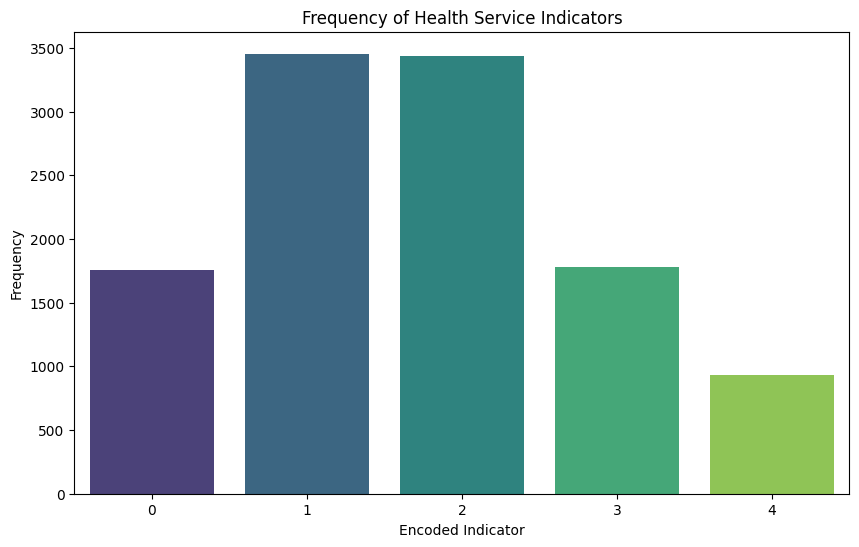

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_health_services, x='Indicator_encoded', palette='viridis')
plt.xlabel('Encoded Indicator')
plt.ylabel('Frequency')
plt.title('Frequency of Health Service Indicators')
plt.show()


**The graph visualizes the frequency of different health service indicators encoded as numbers 0 to 4. Each bar represents the number of records for a specific indicator in the dataset. The x-axis is labeled "Encoded Indicator," indicating the encoded values, while the y-axis is labeled "Frequency," representing the count of occurrences for each indicator.**

**The graph shows that indicators '1' and '2' have the highest frequencies, suggesting they are common health service measures in the dataset. In contrast, indicators '0', '3', and '4' have progressively lower frequencies, indicating they are less common.
 Population using at least basic sanitation ser.. =2**

C:\Users\user\AppData\Local\Temp\ipykernel_13376\1596156967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_health_services, x='Period', y='Indicator_encoded', palette='Set3')


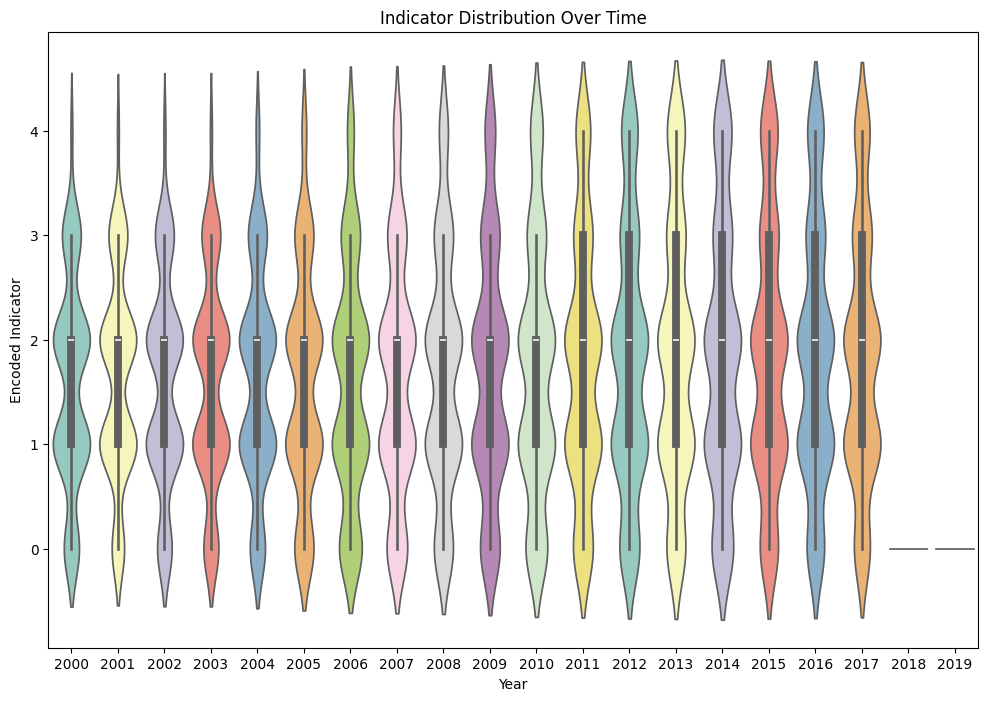

In [75]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_health_services, x='Period', y='Indicator_encoded', palette='Set3')
plt.xlabel('Year')
plt.ylabel('Encoded Indicator')
plt.title('Indicator Distribution Over Time')
plt.show()


**Variation in Shape and Spread: The shape and width of each violin portray the density and spread of data points across different years for each indicator level.
Broader sections or multiple peaks suggest higher data concentration or prevalent values during specific years.
Insights from Data: The consistent presence of all indicator levels throughout the years indicates continuous recording of diverse health service measures. Changes in violin shapes or peaks signify alterations in data distribution or significant events across varying years.**


C:\Users\user\AppData\Local\Temp\ipykernel_13376\1030691191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_mortality, x='Period', y='First Tooltip', palette='viridis')


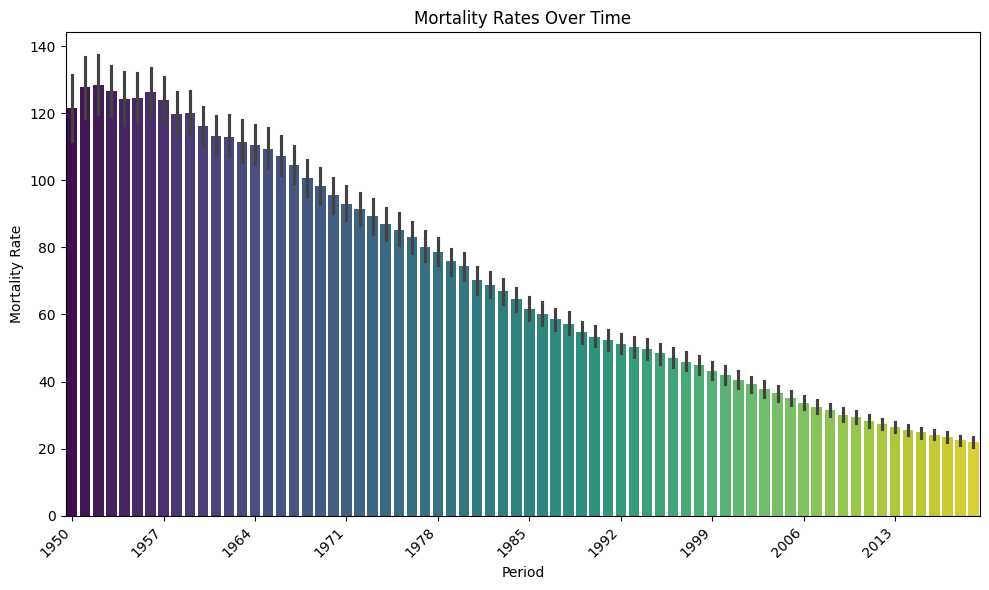

In [76]:
# Calculate the number of periods and set the tick frequency
num_periods = merged_mortality['Period'].nunique()
tick_frequency = max(1, num_periods // 10)  # Adjust tick frequency as needed

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_mortality, x='Period', y='First Tooltip', palette='viridis')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rates Over Time')
plt.xticks(np.arange(0, num_periods, tick_frequency), rotation=45, ha='right')  # Specify tick locations and adjust rotation
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


**The graph depicts a noticeable declining trend in mortality rates over the specified period, starting with higher rates in the early 1950s and progressively decreasing towards 2013. <br>
The color transition from dark purple to light yellow effectively accentuates the decreasing trend in mortality rates, with darker colors representing higher rates and lighter colors indicating lower rates. <br>
This visualization effectively communicates a positive trend in public health, indicating potential improvements in medical practices, healthcare accessibility, or general health conditions over the studied period. The choice of a color gradient further enhances the visual message, emphasizing the reduction in mortality rates over time.**

C:\Users\user\AppData\Local\Temp\ipykernel_13376\504656264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=merged_mortality, x='Period', y='First Tooltip', estimator='mean', ci='sd', color='skyblue')


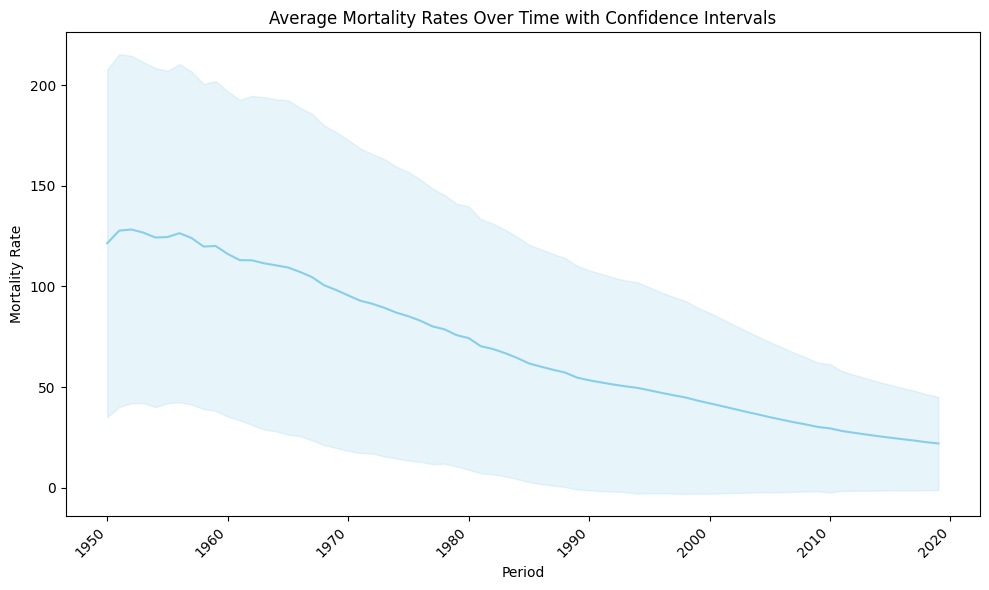

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_mortality, x='Period', y='First Tooltip', estimator='mean', ci='sd', color='skyblue')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.title('Average Mortality Rates Over Time with Confidence Intervals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_13376\3203347312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_mortality, x='Decade', y='First Tooltip', palette='viridis')


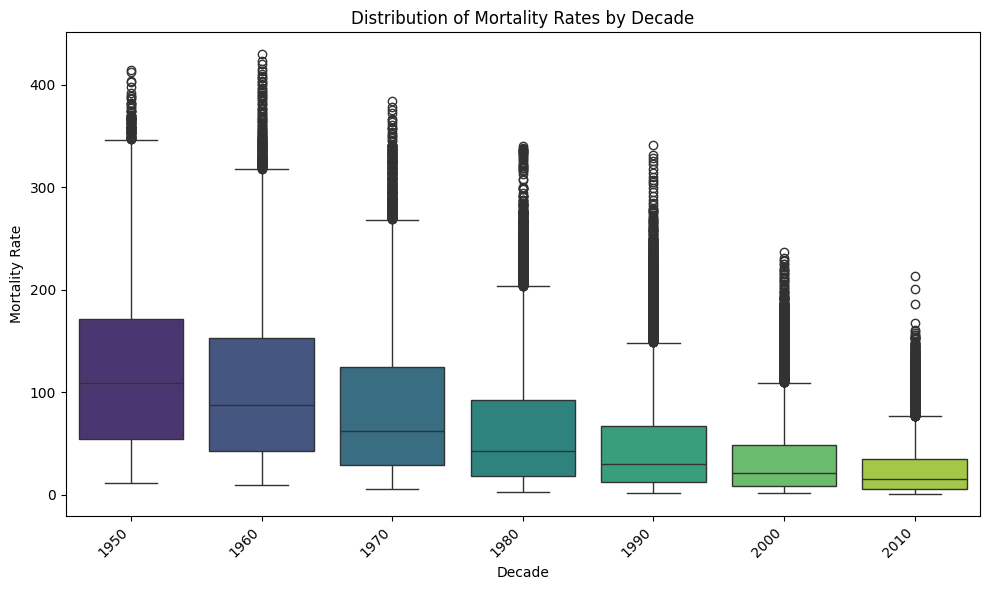

In [78]:
# Extract decade from period
merged_mortality['Decade'] = (merged_mortality['Period'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_mortality, x='Decade', y='First Tooltip', palette='viridis')
plt.xlabel('Decade')
plt.ylabel('Mortality Rate')
plt.title('Distribution of Mortality Rates by Decade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Each box in the chart represents the interquartile range (IQR) of mortality rates for a specific decade. The line inside the box shows the median rate, while the whiskers extend to illustrate the data range within 1.5 times the IQR. Outliers beyond this range are plotted individually. <br>
A clear decrease in median mortality rates is observed from the 1950s to the 2010s, indicating substantial improvements in health outcomes over the decades. <br>
The reduced spread and narrower range of the boxes in recent decades suggest a decrease in variability and extreme values, indicating more consistent health outcomes over time. <br>
The presence of outliers, especially in earlier decades, highlights extreme mortality rates significantly higher than the typical ranges during those periods.**

C:\Users\user\AppData\Local\Temp\ipykernel_13376\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


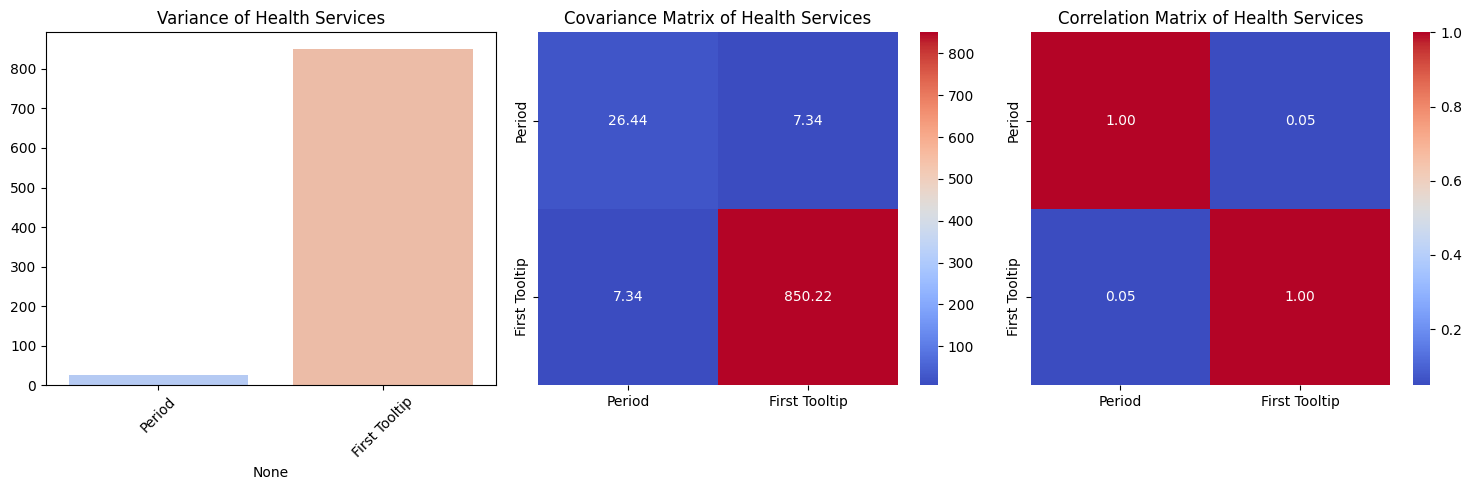

C:\Users\user\AppData\Local\Temp\ipykernel_13376\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


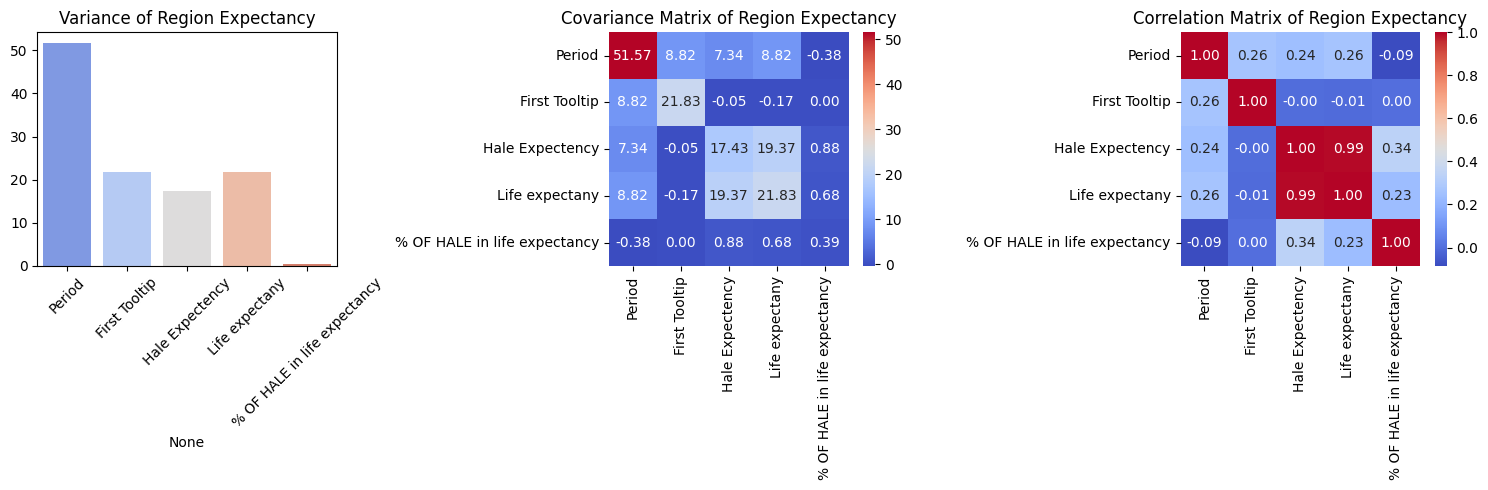

C:\Users\user\AppData\Local\Temp\ipykernel_13376\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


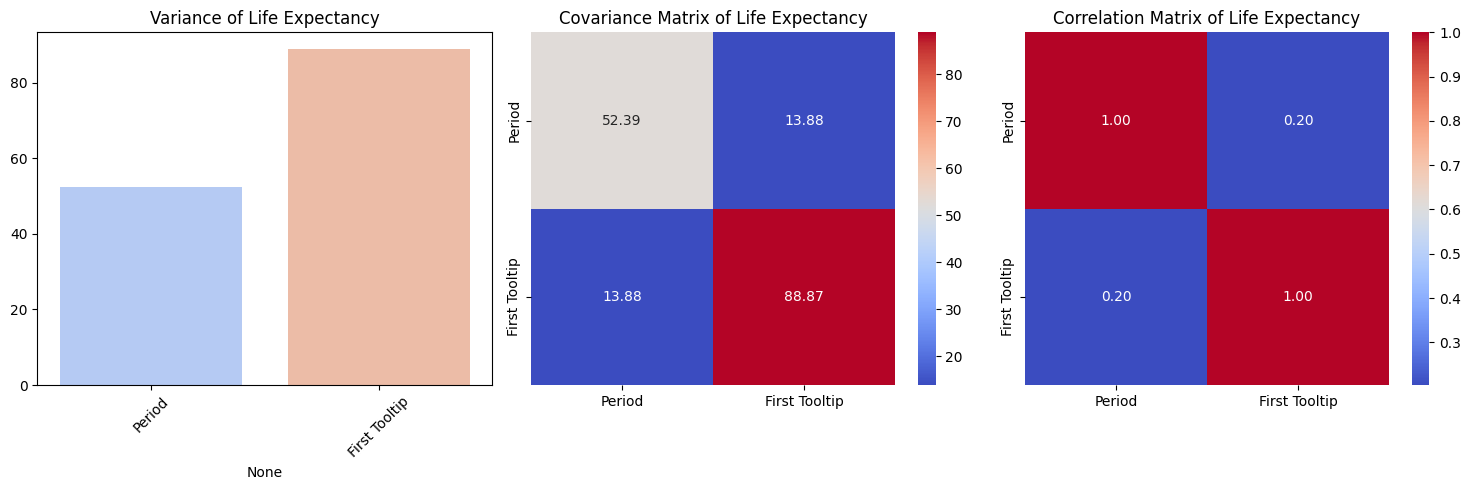

C:\Users\user\AppData\Local\Temp\ipykernel_13376\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


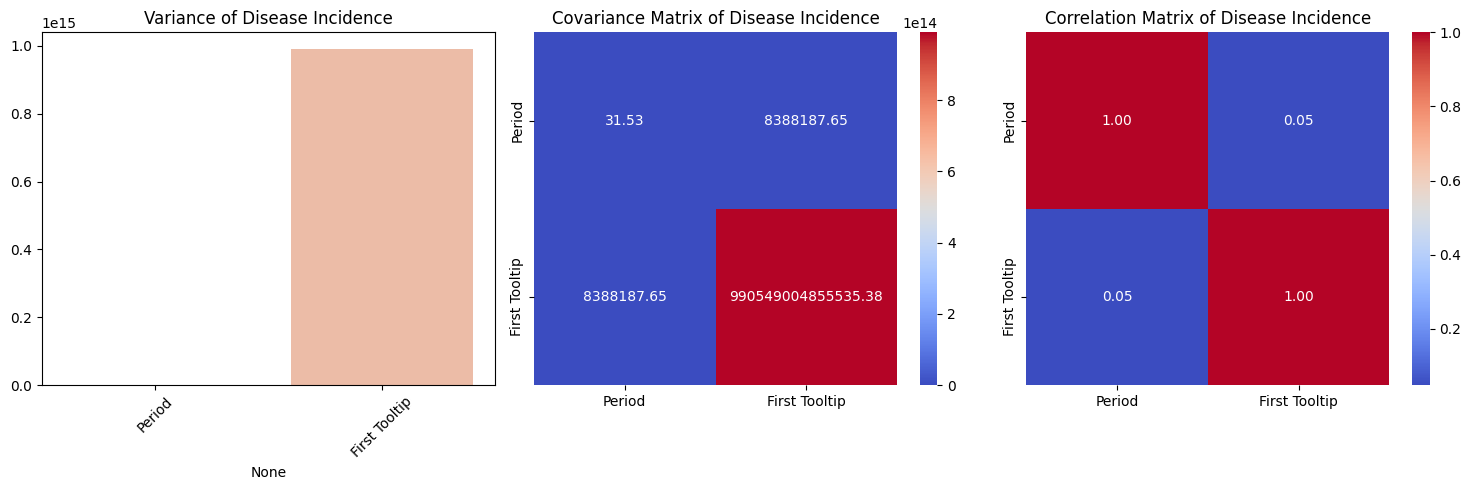

C:\Users\user\AppData\Local\Temp\ipykernel_13376\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


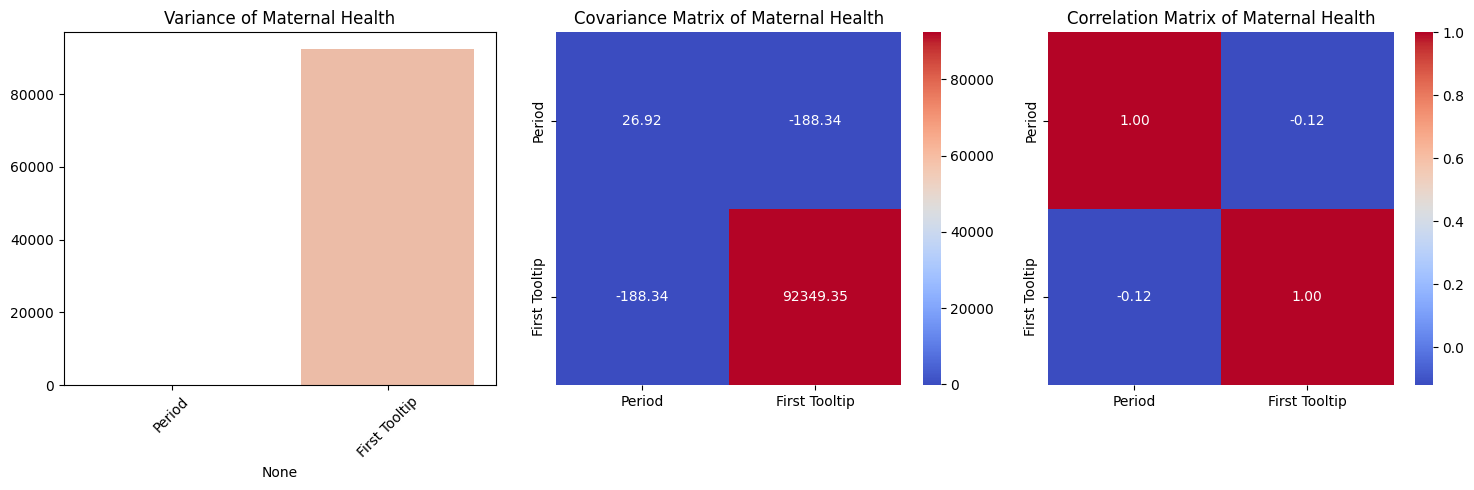

C:\Users\user\AppData\Local\Temp\ipykernel_13376\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


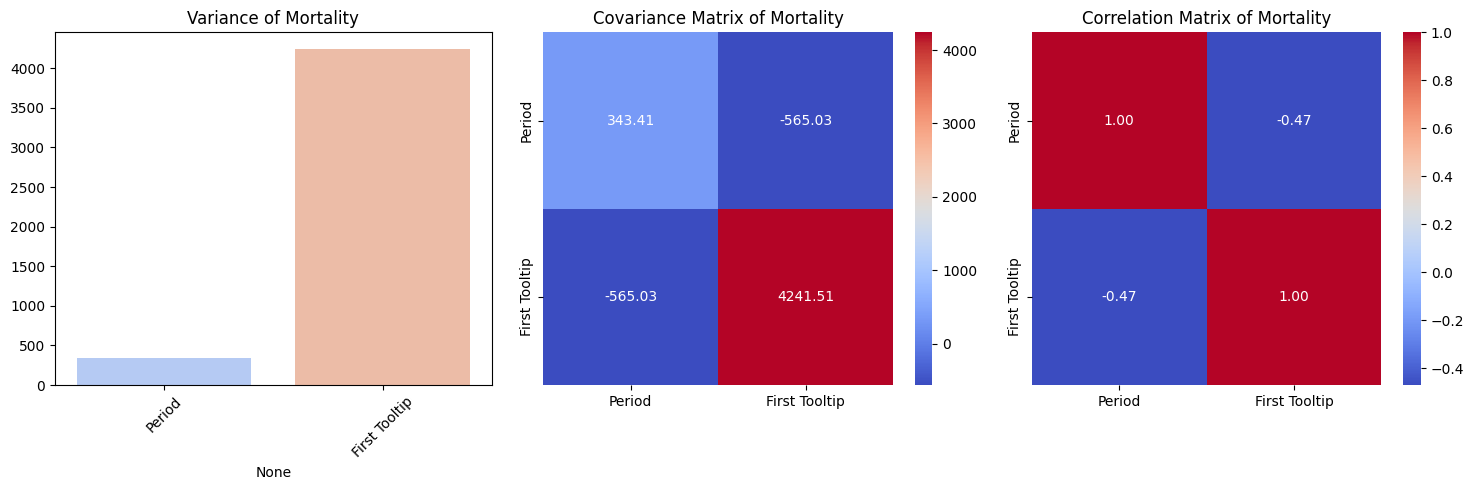

In [79]:
# List of merged datasets with their names and respective DataFrames
merged_datasets = [
    ('Health Services', merged_health_services),
    ('Region Expectancy', merged_region_expectancy),
    ('Life Expectancy', merged_life_expectancy),
    ('Disease Incidence', merged_disease_incidence),
    ('Maternal Health', merged_maternal_health),
    ('Mortality', merged_mortality)
]

# Calculate and plot variance, covariance, and correlation values for each dataset
for dataset_name, merged_df in merged_datasets:
    # Exclude columns
    columns_to_exclude = ['Decade', 'Indicator_encoded', 'Location_encoded']
    numeric_columns = merged_df.select_dtypes(include=np.number).drop(columns=columns_to_exclude, errors='ignore')
    
    # Calculate variance, covariance, and correlation
    variance_values = numeric_columns.var()
    covariance_matrix = numeric_columns.cov()
    correlation_matrix = numeric_columns.corr()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')
    plt.title(f'Variance of {dataset_name}')
    plt.xticks(rotation=45)
    plt.subplot(1, 3, 2)
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Covariance Matrix of {dataset_name}')
    plt.subplot(1, 3, 3)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix of {dataset_name}')
    plt.tight_layout()
    plt.show()


**The first 3 plots of Region Expectancy: <br>
Variance Plot: Highlights larger variance in specific categories, indicating greater variability in certain aspects of the data.<br>
Covariance Matrix: Color variations (blue and red) likely denote positive and negative relationships; values show the extent of association between variables.<br>
Correlation Matrix: Reflects normalized correlations (-1 to 1), with 1 indicating a perfect positive linear relationship, -1 a perfect negative relationship, and 0 no linear relationship.<br>
Statistical Insight: These plots aid in understanding how different health service metrics interact, crucial for resource allocation, policy development, and health intervention evaluation.<br>
Visual Effectiveness: Color usage in heatmaps effectively communicates relationship strength and direction in the correlation matrix.**

**The second 3 plots of Life Expectancy: <br>
Variance Plots: Depict variance in life expectancy across regions and time periods.<br>
Higher variance suggests greater disparities within groups or over time.**

**Covariance Matrices: Displayed as heatmaps for region and life expectancy, showing how two variables change together. <br>
Positive values indicate both variables increase together, while negative values show inverse relationships.<br>
Correlation Matrices:
Also shown as heatmaps, normalize covariance, providing standardized correlation measures from -1 to 1.<br>
A correlation of 1 implies a perfect positive relationship, -1 a perfect negative relationship, and 0 no linear relationship.<br>
Self-correlations (e.g., 1.00 correlations) reflect a variable paired with itself.**

**Visual Representation: Bar plots for variance offer direct variability comparisons. <br>
Heatmaps for covariance and correlation visualize complex relationships effectively.<br>
Matrices reveal relationships between different expectancy measures like life expectancy, male (Hale) expectancy, and percentage of Hale in life expectancy.<br>
Insights help understand how factors or demographics relate within the broad topic of life expectancy.**

**The same analysis goes on...**

### Merging dataframes except merged_region_expectancy

In [80]:
# Merge all the dataframes except the region one
dataframes_to_merge = [merged_mortality, merged_life_expectancy, merged_health_services, merged_disease_incidence, merged_maternal_health]
# Filter out None values in case any of the merges returned None
dataframes_to_merge = [df for df in dataframes_to_merge if df is not None]

# Concatenate all dataframes
if dataframes_to_merge:
    final_merged_df = pd.concat(dataframes_to_merge, ignore_index=True)
    print(merged_df.head())
else:
    print("No dataframes to merge.")

      Location  Period                                          Indicator  \
0  Afghanistan    2019  Infant mortality rate (probability of dying be...   
1  Afghanistan    2019  Infant mortality rate (probability of dying be...   
2  Afghanistan    2019  Infant mortality rate (probability of dying be...   
3  Afghanistan    2018  Infant mortality rate (probability of dying be...   
4  Afghanistan    2018  Infant mortality rate (probability of dying be...   

   First Tooltip  Indicator_encoded  Location_encoded  Decade  
0          46.51                  1                 0    2010  
1          49.80                  1                 0    2010  
2          43.05                  1                 0    2010  
3          48.04                  1                 0    2010  
4          51.35                  1                 0    2010  


In [81]:
final_merged_df.drop(columns=['Decade'], inplace=True)



In [82]:
final_merged_df.head()

,Location,Period,Indicator,First Tooltip,Indicator_encoded,Location_encoded
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,46.51,1,0
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,49.80,1,0
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,43.05,1,0
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,48.04,1,0
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,51.35,1,0


In [83]:
final_merged_df.describe()

,Period,First Tooltip,Indicator_encoded,Location_encoded
count,105094.000000,9.379900e+04,105094.000000,105094.000000
mean,1996.556235,1.831221e+05,2.501713,91.043713
std,17.976663,7.741974e+06,1.843684,53.397178
min,1920.000000,0.000000e+00,0.000000,0.000000
25%,1984.000000,1.727667e+01,1.000000,44.000000
50%,2002.000000,4.823000e+01,2.000000,90.000000
75%,2011.000000,9.517000e+01,5.000000,136.000000
max,2019.000000,8.460000e+08,5.000000,199.000000


In [84]:
#Apply log transformation for the merged_mortality and merged_disease_incidence dfs because of the outliers they have.
# Define a small positive constant
epsilon = 1e-10

# Handle outliers and apply log transformation for merged_mortality
merged_mortality['First Tooltip'] = np.log(merged_mortality['First Tooltip'].replace(0, np.nan).replace(np.nan, epsilon))

# Handle outliers and apply log transformation for merged_disease_incidence
merged_disease_incidence['First Tooltip'] = np.log(merged_disease_incidence['First Tooltip'].replace(0, np.nan).replace(np.nan, epsilon))


In [85]:
final_merged_df.isnull().sum()


Location                 0
Period                   0
Indicator                0
First Tooltip        11295
Indicator_encoded        0
Location_encoded         0
dtype: int64

In [86]:
# Step 1: Check for null values before merging
print("Null values in df1 before merging:")
print(merged_mortality.isnull().sum())

print("Null values in df2 before merging:")
print(merged_life_expectancy.isnull().sum())

print("Null values in df3 before merging:")
print(merged_health_services.isnull().sum())

print("Null values in df5 before merging:")
print(merged_disease_incidence.isnull().sum())

print("Null values in df4 before merging:")
print(merged_maternal_health.isnull().sum())


# Step 2: Check for null values after merging
null_counts_after_merge = final_merged_df.isnull().sum()
print("Null values after merging:")
print(null_counts_after_merge[null_counts_after_merge > 0])

# Step 3: Locate rows with null values
rows_with_nulls = final_merged_df[final_merged_df.isnull().any(axis=1)]
print("Rows with null values:")
print(rows_with_nulls.head())

# Analyze why null values appear
# This might be due to different columns in original dataframes or mismatched indexes during merge


Null values in df1 before merging:
Location             0
Period               0
Indicator            0
First Tooltip        0
Indicator_encoded    0
Location_encoded     0
Decade               0
dtype: int64
Null values in df2 before merging:
Location             0
Period               0
Indicator            0
First Tooltip        0
Indicator_encoded    0
Location_encoded     0
dtype: int64
Null values in df3 before merging:
Location             0
Period               0
Indicator            0
First Tooltip        0
Indicator_encoded    0
Location_encoded     0
dtype: int64
Null values in df5 before merging:
Location             0
Period               0
Indicator            0
First Tooltip        0
Indicator_encoded    0
Location_encoded     0
dtype: int64
Null values in df4 before merging:
Location             0
Period               0
Indicator            0
First Tooltip        0
Indicator_encoded    0
Location_encoded     0
dtype: int64
Null values after merging:
First Tooltip    112

In [87]:
# Filter rows with null values in 'First Tooltip' column
null_values = final_merged_df[final_merged_df['First Tooltip'].isnull()]

# Display the filtered DataFrame
print(null_values)


            Location  Period  \
9100           Egypt    1976   
12329         Guinea    1964   
27207   Sierra Leone    1981   
33846       Botswana    1957   
35340       Cameroon    1970   
...              ...     ...   
101782      Zimbabwe    2014   
101786      Zimbabwe    2015   
101790      Zimbabwe    2016   
101793      Zimbabwe    2017   
101796      Zimbabwe    2018   

                                                Indicator  First Tooltip  \
9100    Infant mortality rate (probability of dying be...            NaN   
12329   Infant mortality rate (probability of dying be...            NaN   
27207   Infant mortality rate (probability of dying be...            NaN   
33846   Under-five mortality rate (probability of dyin...            NaN   
35340   Under-five mortality rate (probability of dyin...            NaN   
...                                                   ...            ...   
101782   Malaria incidence (per 1 000 population at risk)            NaN   
101786 

In [88]:
print(final_merged_df.dtypes)

Location              object
Period                 int64
Indicator             object
First Tooltip        float64
Indicator_encoded      int32
Location_encoded       int32
dtype: object


In [89]:
#use median imputation since its float 
# Calculate the median of 'First Tooltip' column
median_tooltip = final_merged_df['First Tooltip'].median()

# Fill missing values with median using loc or directly assignment
final_merged_df['First Tooltip'].fillna(median_tooltip, inplace=True)

# Verify that missing values are filled
print("Null values in the DataFrame after imputation:")
print(final_merged_df.isnull().sum())


Null values in the DataFrame after imputation:
Location             0
Period               0
Indicator            0
First Tooltip        0
Indicator_encoded    0
Location_encoded     0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13376\2874726536.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_df['First Tooltip'].fillna(median_tooltip, inplace=True)


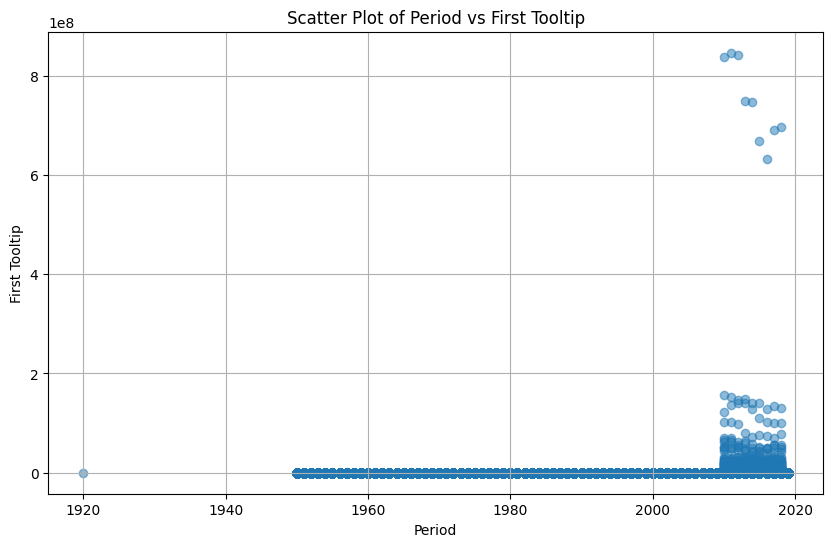

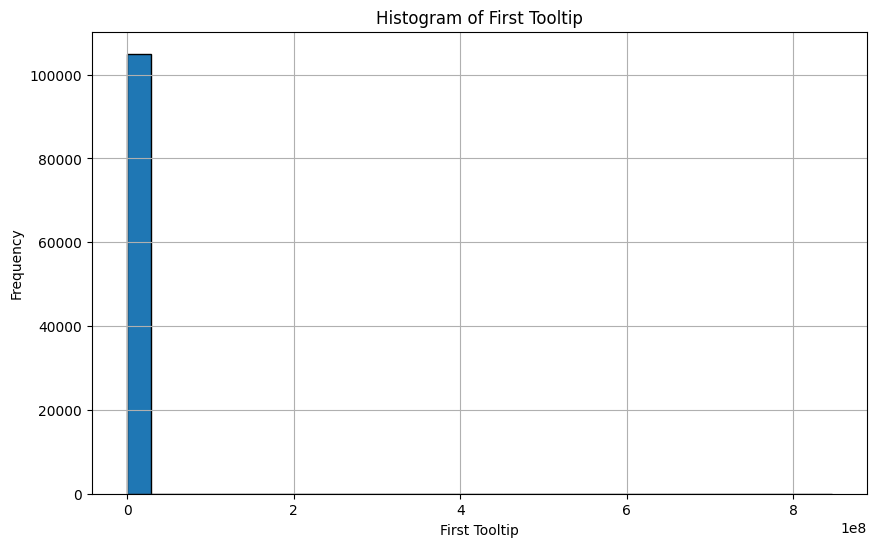

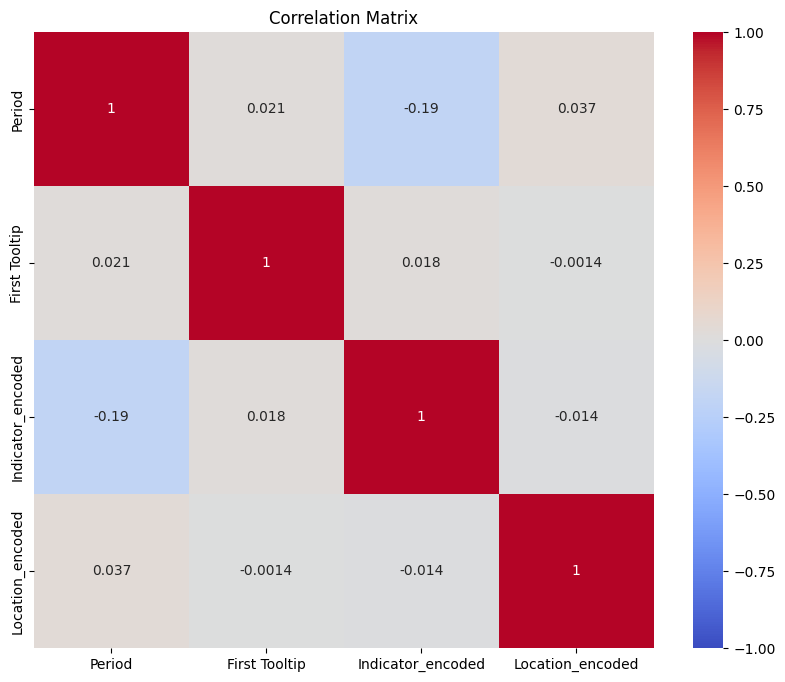

In [90]:
# Scatter plot between 'Period' and 'First Tooltip'
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_df['Period'], final_merged_df['First Tooltip'], alpha=0.5)
plt.title('Scatter Plot of Period vs First Tooltip')
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.grid(True)
plt.show()

# Histogram of 'First Tooltip'
plt.figure(figsize=(10, 6))
plt.hist(final_merged_df['First Tooltip'], bins=30, edgecolor='black')
plt.title('Histogram of First Tooltip')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Select numeric columns for correlation calculation
numeric_cols = final_merged_df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()




In [91]:
# Remove outliers using IQR method
col = 'First Tooltip'
Q1 = final_merged_df[col].quantile(0.25)
Q3 = final_merged_df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_merged_df_no_outliers = final_merged_df[(final_merged_df[col] >= lower_bound) & (final_merged_df[col] <= upper_bound)]


### Split & Scale Merged Data

In [92]:

# Define features (X) and target (y) for final_merged_df_no_outliers
X_cols_final = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_final = 'First Tooltip'

X_final = final_merged_df_no_outliers[X_cols_final]
y_final = final_merged_df_no_outliers[y_col_final]

# Split data into training and test sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Scale numerical features
scaler_final = StandardScaler()
X_train_scaled_final = scaler_final.fit_transform(X_train_final)
X_test_scaled_final = scaler_final.transform(X_test_final)


### Split & Scale merged_region_expectancy

In [93]:
# Define features (X) and target (y)
X_cols_region = ['Location_encoded', 'Period', 'Indicator_encoded', 'Hale Expectency', 'Life expectany', '% OF HALE in life expectancy']
y_col_region = 'First Tooltip'

X_region = merged_region_expectancy[X_cols_region]
y_region = merged_region_expectancy[y_col_region]

# Split data into training and test sets
X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_region, y_region, test_size=0.2, random_state=42)

# Scale numerical features
scaler_region = StandardScaler()
X_train_scaled_region = scaler_region.fit_transform(X_train_region)
X_test_scaled_region = scaler_region.transform(X_test_region)

# Now can use X_train_scaled_region, X_test_scaled_region, y_train_region, y_test_region 
# For example:
# 1. Train model using X_train_scaled_region, y_train_region
# 2. Evaluate model using X_test_scaled_region, y_test_region

## Cross Validation

### Cross Validation  on the Merged Dataframe

#### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression Model
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train_scaled_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
linear_mean_cv_score = np.mean(np.abs(linear_cv_scores))

print(f"Linear Regression Mean CV MSE: {linear_mean_cv_score}")


Linear Regression Mean CV MSE: 1584.0209936169986


#### Linear Kernel SVM

In [95]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV

# SVM Model with Linear Kernel
svm_model_linear = SVR(kernel='linear')
svm_cv_scores_linear = cross_val_score(svm_model_linear, X_train_scaled_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
svm_mean_cv_score_linear = np.mean(np.abs(svm_cv_scores_linear))

print(f"SVM (Linear Kernel) Mean CV MSE: {svm_mean_cv_score_linear}")


SVM (Linear Kernel) Mean CV MSE: 1667.1258849449991


#### Polynomial Kernel SVM

In [96]:
# Initialize and train SVR with polynomial kernel
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.01)

# Perform cross-validation
svm_cv_scores_poly = cross_val_score(svr_poly, X_train_scaled_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
svm_mean_cv_score_poly = np.mean(np.abs(svm_cv_scores_poly))

# Train the SVR model on the entire training set



print(f"SVM (Polynomial Kernel) Mean CV MSE: {svm_mean_cv_score_poly}")


SVM (Polynomial Kernel) Mean CV MSE: 1612.6645858292836


#### RBF Kernel SVM

In [97]:
# Range of C and gamma values to test
C_values = [1, 10]
gamma_values = [0.1, 1]

best_mean_cv_score = float('inf')
best_params = {}

# Loop for SVR with RBF kernel, C values, and gamma values
for C in C_values:
    for gamma in gamma_values:
        # Create an SVR model
        svr = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=0.01)
        
        # Perform cross-validation
        cv_scores = cross_val_score(svr, X_train_scaled_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
        mean_cv_score = np.mean(np.abs(cv_scores))
        
        # Print current settings
        print(f'SVR: C = {C}, gamma = {gamma}, 5-fold CV MSE = {mean_cv_score}')
        
        # Update the best parameters if the current mean is better
        if mean_cv_score < best_mean_cv_score:
            best_mean_cv_score = mean_cv_score
            best_params = {'C': C, 'gamma': gamma}

print(f'Best SVR parameters: {best_params}, Mean CV MSE: {best_mean_cv_score}')


SVR: C = 1, gamma = 0.1, 5-fold CV MSE = 1596.8378848037594
SVR: C = 1, gamma = 1, 5-fold CV MSE = 1519.3925090803964
SVR: C = 10, gamma = 0.1, 5-fold CV MSE = 1569.0564287141892
SVR: C = 10, gamma = 1, 5-fold CV MSE = 1530.0649118145666
Best SVR parameters: {'C': 1, 'gamma': 1}, Mean CV MSE: 1519.3925090803964


#### DR

In [98]:
from sklearn.decomposition import PCA
#Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca_final = pca.fit_transform(X_train_scaled_final)
X_test_pca_final = pca.transform(X_test_scaled_final)


In [99]:
# Initialize and train SVR with RBF kernel
svr = SVR(kernel='rbf', C=1.0, gamma=1.0, epsilon=0.01)

# Perform cross-validation
svm_cv_scores_rbf = cross_val_score(svr, X_train_pca_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
svm_mean_cv_score_rbf = np.mean(np.abs(svm_cv_scores_rbf))


print(f"SVM (RBF Kernel) Mean CV MSE: {svm_mean_cv_score_rbf}")


SVM (RBF Kernel) Mean CV MSE: 1519.3925090803973


In [100]:
# Linear Regression Model
linear_model = LinearRegression()
linear_cv_scores_pca = cross_val_score(linear_model, X_train_pca_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
linear_mean_cv_score_pca = np.mean(np.abs(linear_cv_scores_pca))


print(f"Linear Regression Mean CV MSE with PCA: {linear_mean_cv_score_pca}")



Linear Regression Mean CV MSE with PCA: 1584.0209936169986


Using PCA did not improve the performance much so will not use it. Linear Regression: The performance of Linear Regression with and without PCA is almost identical. This suggests that PCA did not significantly affect the model's performance.
SVR Models:
The RBF kernel performs better than both the Linear and Polynomial kernels.
Applying PCA did not change the performance of the RBF kernel SVR, indicating that PCA did not significantly impact the SVR model.

#### Random Forests

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


# Define a smaller parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled_final, y_train_final)

# Best parameters and score
best_params = grid_search.best_params_
best_score = np.abs(grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best CV MSE: {best_score}")



Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV MSE: 460.82440685038466


#### Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize and train Gradient Boosting with specified parameters
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation
gb_cv_scores = cross_val_score(gb, X_train_scaled_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
gb_mean_cv_score = np.mean(np.abs(gb_cv_scores))

print(f"Gradient Boosting Mean CV MSE: {gb_mean_cv_score}")


Gradient Boosting Mean CV MSE: 1154.6910678115576


In [103]:
# Define a smaller parameter grid for Gradient Boosting
param_grid_gb = {
   'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search_gb.fit(X_train_scaled_final, y_train_final)

# Best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = np.abs(grid_search_gb.best_score_)

print(f"Best Gradient Boosting parameters: {best_params_gb}")
print(f"Best Gradient Boosting CV MSE: {best_score_gb}")

Best Gradient Boosting parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting CV MSE: 480.5232280836393


In [104]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score

# Best parameters and score from GridSearchCV
best_params_gb = grid_search_gb.best_params_
best_score_gb = np.abs(grid_search_gb.best_score_)

print(f"Narrowed Grid Search Best Gradient Boosting parameters: {best_params_gb}")
print(f"Narrowed Grid Search Best Gradient Boosting CV MSE: {best_score_gb}")

# Use the best estimator from the GridSearchCV
best_model = grid_search_gb.best_estimator_

# Get cross-validated predictions
cv_predictions = cross_val_predict(best_model, X_train_scaled_final, y_train_final, cv=5)

# Calculate cross-validation MAE
cv_mae = mean_absolute_error(y_train_final, cv_predictions)
print(f"Cross-Validation MAE: {cv_mae}")

# Calculate cross-validation R²
cv_r2 = r2_score(y_train_final, cv_predictions)
print(f"Cross-Validation R-squared (R²): {cv_r2}")

Narrowed Grid Search Best Gradient Boosting parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Narrowed Grid Search Best Gradient Boosting CV MSE: 480.5232280836393
Cross-Validation MAE: 15.71361804448429
Cross-Validation R-squared (R²): 0.7226307265172249


#### Baseline Model

In [105]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

# Initialize DummyRegressor with 'mean' strategy
dummy = DummyRegressor(strategy='mean')

# Perform cross-validation
dummy_cv_scores = cross_val_score(dummy, X_train_scaled_final, y_train_final, cv=5, scoring='neg_mean_squared_error')
dummy_mean_cv_score = np.mean(np.abs(dummy_cv_scores))

print(f"Baseline Mean Predictor CV MSE: {dummy_mean_cv_score}")



Baseline Mean Predictor CV MSE: 1732.4501327715993


### Cross Validation for merged_region_expectancy

#### Random Forest

In [106]:
# Define the Random Forest model with the best parameters
best_rf = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(best_rf, X_train_scaled_region, y_train_region, cv=5, scoring='neg_mean_squared_error')
rf_mean_cv_score = np.mean(np.abs(rf_cv_scores))

print(f"Random Forest Mean CV MSE with merged_region_expectancy: {rf_mean_cv_score}")


Random Forest Mean CV MSE with merged_region_expectancy: 21.70019408286778


In [107]:
# Define the Gradient Boosting model with specified parameters
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation
gb_cv_scores = cross_val_score(gb, X_train_scaled_region, y_train_region, cv=5, scoring='neg_mean_squared_error')
gb_mean_cv_score = np.mean(np.abs(gb_cv_scores))

print(f"Gradient Boosting Mean CV MSE with merged_region_expectancy: {gb_mean_cv_score}")

Gradient Boosting Mean CV MSE with merged_region_expectancy: 7.560402962473326


#### RBF Kernel SVM

In [108]:
# Define the SVR model with the best parameters
svr = SVR(kernel='rbf', C=1, gamma=1, epsilon=0.01)

# Perform cross-validation
svr_cv_scores = cross_val_score(svr, X_train_scaled_region, y_train_region, cv=5, scoring='neg_mean_squared_error')
svr_mean_cv_score = np.mean(np.abs(svr_cv_scores))

print(f"SVR (RBF Kernel) Mean CV MSE with merged_region_expectancy: {svr_mean_cv_score}")



SVR (RBF Kernel) Mean CV MSE with merged_region_expectancy: 27.899129918247276


#### Gradient Boosting 

In [109]:
# Define a parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled_region, y_train_region)

# Best parameters and score
best_params = grid_search.best_params_
best_score = np.abs(grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best CV MSE: {best_score}")

# Output the best model without training on the entire dataset
best_gb = grid_search.best_estimator_


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV MSE: 7.106079920663386


In [110]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score

# Use the best estimator from the GridSearchCV
best_gb = grid_search_gb.best_estimator_

# Get cross-validated predictions
cv_predictions = cross_val_predict(best_gb, X_train_scaled_region, y_train_region, cv=5)

# Calculate cross-validation MAE
cv_mae = mean_absolute_error(y_train_region, cv_predictions)
print(f"Cross-Validation MAE: {cv_mae}")

# Calculate cross-validation R²
cv_r2 = r2_score(y_train_region, cv_predictions)
print(f"Cross-Validation R-squared (R²): {cv_r2}")

Cross-Validation MAE: 2.5734215913303893
Cross-Validation R-squared (R²): 0.446986229873089


#### Baseline Model

In [111]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy_cv_scores = cross_val_score(dummy,X_train_scaled_region, y_train_region, cv=5, scoring='neg_mean_squared_error')
dummy_mean_cv_score = np.mean(np.abs(dummy_cv_scores))

print(f"Baseline Mean Predictor CV MSE: {dummy_mean_cv_score}")


Baseline Mean Predictor CV MSE: 26.86462607157178


## Train 

Based on these comparisons, the Random Forest and Gradient Boosting models are clearly outperforming the other models like Linear Regression and SVM(linear, polynomial, and RBF).

Also baseline model was used as a benchmark to compare cv mses with mean predictor(1732.4501327715993 for merged dataframe and  26.86462607157178 for merged_region_expectancy) and proved that Random Forest and Gradient Boosting are better.

Both models are strong candidates for final model selection.

However, the Random Forest model has a slightly better CV MSE compared to Gradient Boosting in the MERGED DATAFRAME in which
Best Gradient Boosting CV MSE: 480.5232280836393 and 
Best Random Forest CV MSE: 460.82440685038466. 

Random Forest Mean CV MSE with merged_region_expectancy: 21.70019408286778 and 
Gradient Boosting Mean CV MSE with merged_region_expectancy: 7.560402962473326. 


Gradient Boosting will be chosen for both datasets because:
1-It has a significantly lower CV MSE for the merged region expectancy data.
2-Its performance on the merged dataframe is very close to that of Random Forest, with only a small difference in CV MSE.
3-Gradient Boosting is often more robust and provides better generalization performance

In [112]:
#Merged Dataframe
# Best hyperparameters found from GridSearchCV
best_params = {
    'learning_rate': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Initialize the Gradient Boosting model with the best hyperparameters
final_model = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Train the model on the entire training dataset
final_model.fit(X_train_scaled_final, y_train_final)

# Predict on the test set
y_test_pred = final_model.predict(X_test_scaled_final)

# Calculate MSE for the Gradient Boosting model on the test set
test_mse = mean_squared_error(y_test_final, y_test_pred)
print(f"Gradient Boosting Mean Squared Error on Test set: {test_mse}")



Gradient Boosting Mean Squared Error on Test set: 473.68957279280164


#### Feature Importance on Merged Dataframe

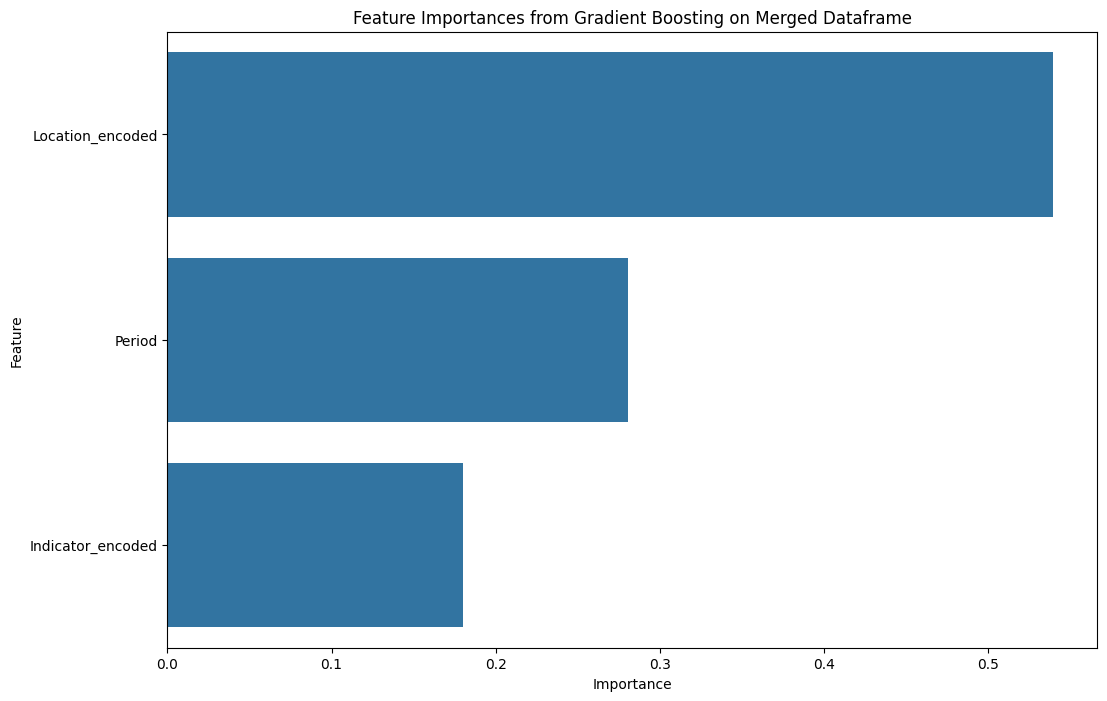

             Feature  Importance
0   Location_encoded    0.539437
1             Period    0.280444
2  Indicator_encoded    0.180119


In [113]:
 # Get feature importances from the best Gradient Boosting model
importances = final_model.feature_importances_

#Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
'Feature': X_train_final.columns,
'Importance': importances
})

#Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting on Merged Dataframe')
plt.show()

print(feature_importance_df)

#### Train on merged_region_expectancy

In [124]:
#Merged_region_expectancy
# Best hyperparameters found from GridSearchCV
best_params = {
    'learning_rate': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Initialize the Gradient Boosting model with the best hyperparameters
final_model2 = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Train the model on the entire training dataset
final_model2.fit(X_train_scaled_region, y_train_region)

# Predict on the test set
y_test_pred_region = final_model2.predict(X_test_scaled_region)

# Calculate MSE for the Gradient Boosting model on the test set
test_mse2 = mean_squared_error(y_test_region , y_test_pred_region)
print(f"Gradient Boosting Mean Squared Error on Test set: {test_mse2}")


Gradient Boosting Mean Squared Error on Test set: 2.714763837982076


##### Feature Importance on merged_region_expectancy

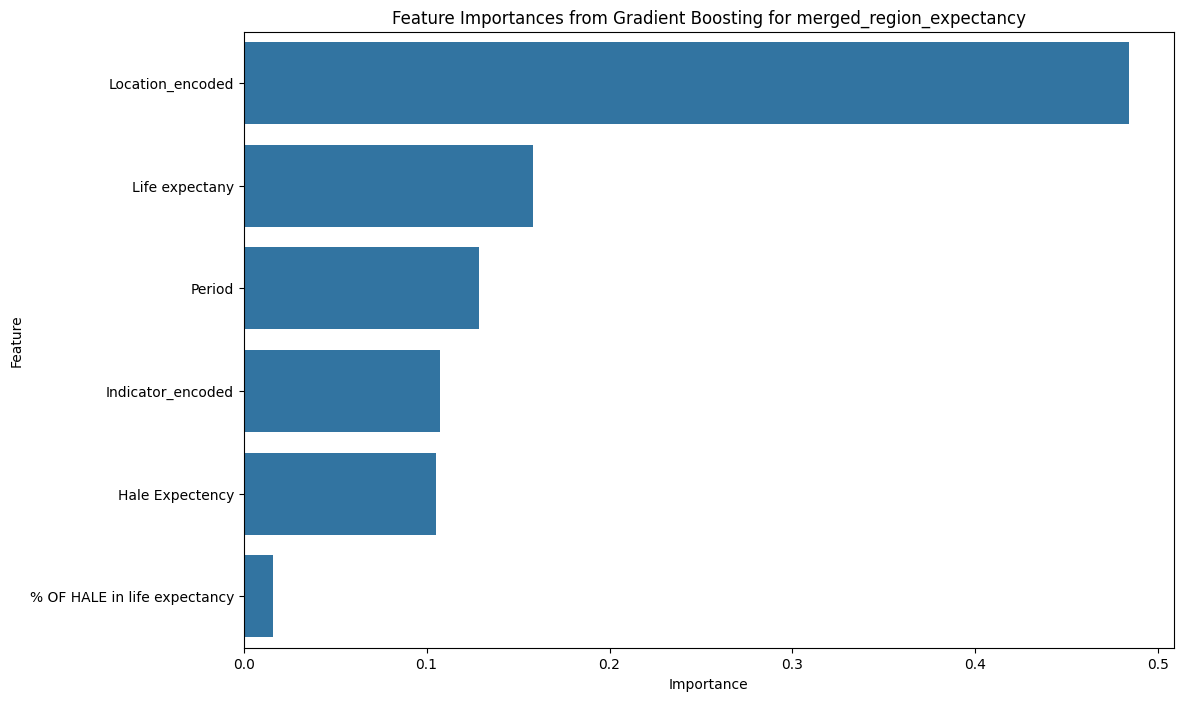

                        Feature  Importance
0              Location_encoded    0.484135
4                Life expectany    0.158173
1                        Period    0.128907
2             Indicator_encoded    0.107510
3               Hale Expectency    0.105385
5  % OF HALE in life expectancy    0.015891


In [115]:
# Get feature importances from the final Gradient Boosting model
importances2 = final_model2.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df2 = pd.DataFrame({
    'Feature': X_region.columns,
    'Importance': importances2
})

# Sort the DataFrame by importance
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df2)
plt.title('Feature Importances from Gradient Boosting for merged_region_expectancy')
plt.show()

print(feature_importance_df2)


### Plots and Performance Metrics for merged_region_expectancy

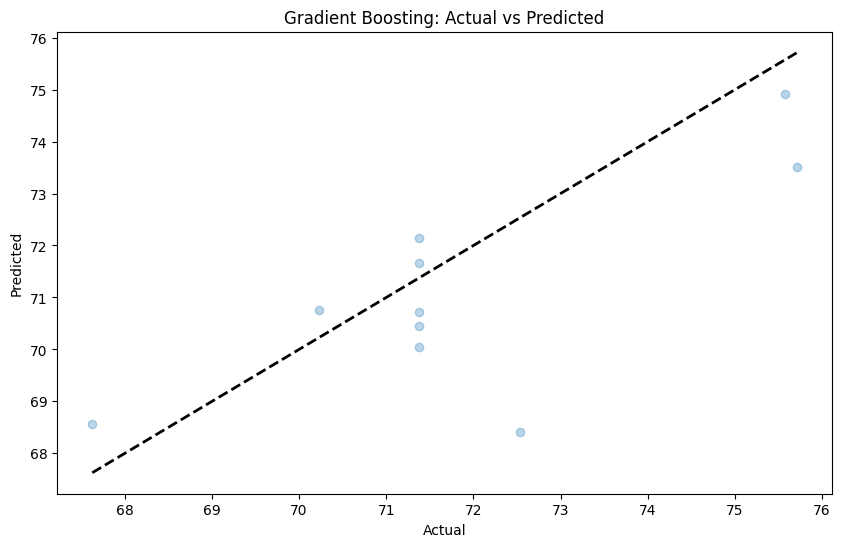

In [116]:
# Plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test_region, y_test_pred_region, alpha=0.3)
plt.plot([y_test_region.min(), y_test_region.max()], [y_test_region.min(), y_test_region.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

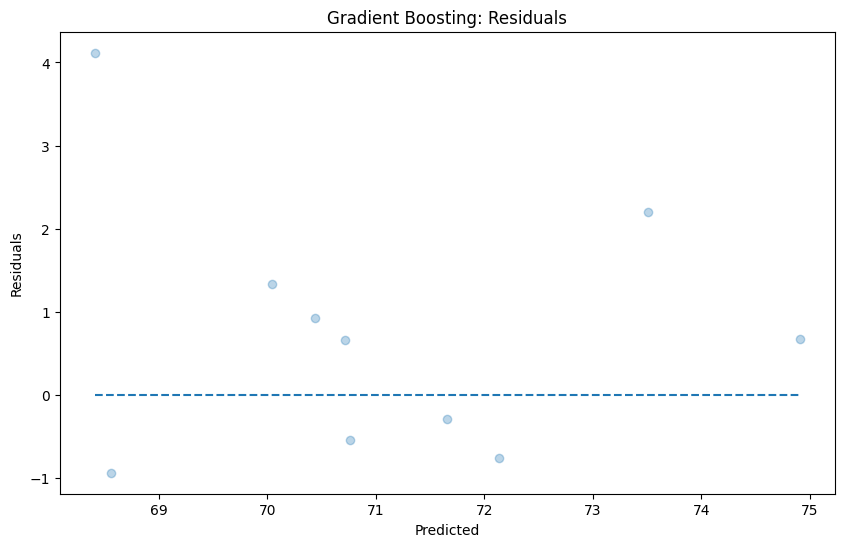

In [117]:
# Residuals for Gradient Boosting
residuals_gb = y_test_region - y_test_pred_region
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_region, residuals_gb, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_region.min(), xmax=y_test_pred_region.max(), linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residuals')
plt.show()


The residuals appear randomly scattered around the zero line, it suggests that the model captures the relationship well and there are no obvious patterns left in the residuals.


#### Performance Metrics on Merged_region_expectancy

In [118]:
 # Baseline model prediction (mean predictor)
y_train_mean = np.mean(y_train_region)
y_test_pred_baseline = np.full_like(y_test_region, y_train_mean)

# Calculate MSE for the baseline model on the test set
baseline_mse_test = mean_squared_error(y_test_region, y_test_pred_baseline)
print(f"Baseline Model Mean Squared Error on Test set: {baseline_mse_test}")

# Compare with Gradient Boosting model
print(f"Gradient Boosting Test MSE Improvement over Baseline: {(baseline_mse_test - test_mse2) / baseline_mse_test * 100:.2f}%")


Baseline Model Mean Squared Error on Test set: 6.3448406528932395
Gradient Boosting Test MSE Improvement over Baseline: 57.21%


In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_region, y_test_pred_region)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_region, y_test_pred_region)

# Calculate R-squared
r2 = r2_score(y_test_region, y_test_pred_region)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.714763837982076
Mean Absolute Error: 1.2427639145181417
R-squared: 0.46612022553671184


### Plots and Performance Metrics for Merged Dataframe

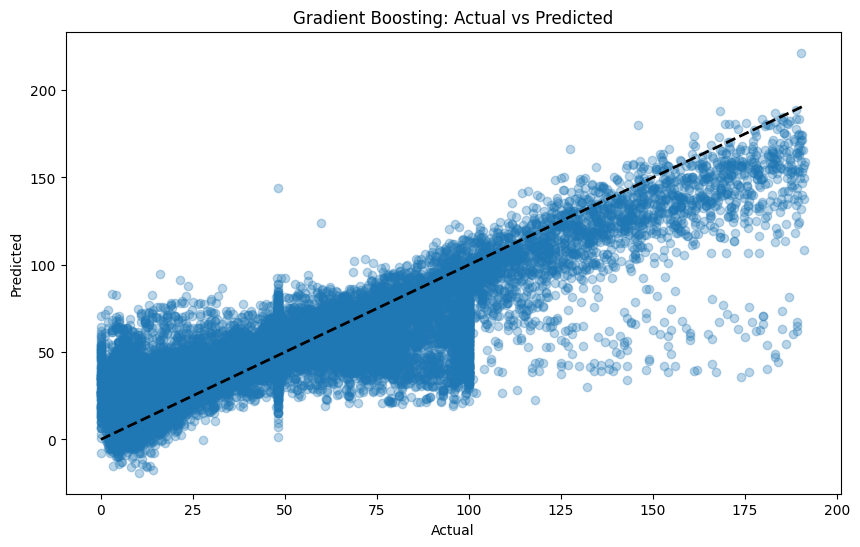

In [120]:
# Plot for Gradient Boosting for Merged
plt.figure(figsize=(10, 6))
plt.scatter(y_test_final, y_test_pred, alpha=0.3)
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

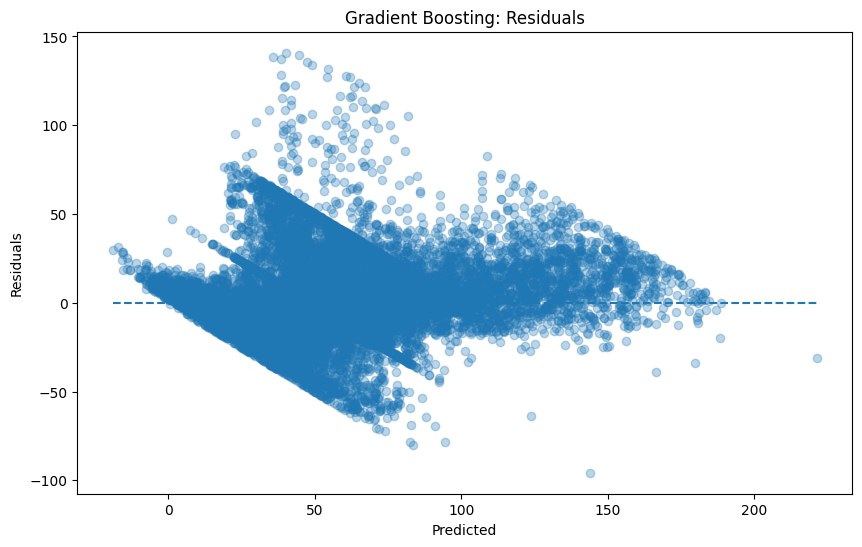

In [121]:
# Residuals for Gradient Boosting
residuals_gb1 = y_test_final - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals_gb1, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residuals')
plt.show()


#### Performance Metrics on Merged Dataframe

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_final, y_test_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_final, y_test_pred)

# Calculate R-squared
r2 = r2_score(y_test_final, y_test_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 473.68957279280164
Mean Absolute Error: 15.618870881691729
R-squared: 0.7222439811184465


In [123]:
# Baseline model prediction (mean predictor)
y_train_mean = np.mean(y_train_final)
y_test_pred_baseline1 = np.full_like(y_test_final, y_train_mean)

# Calculate MSE for the baseline model on the test set
baseline_mse_test1 = mean_squared_error(y_test_final, y_test_pred_baseline1)
print(f"Baseline Model Mean Squared Error on Test set: {baseline_mse_test1}")

# Compare with Gradient Boosting model
print(f"Gradient Boosting Test MSE Improvement over Baseline: {(baseline_mse_test1 - test_mse) / baseline_mse_test1 * 100:.2f}%")

Baseline Model Mean Squared Error on Test set: 1705.9766655749788
Gradient Boosting Test MSE Improvement over Baseline: 72.23%


### Analysis on Model Performance

#### 1. Merged Dataframe without Region

- **Mean Squared Error (MSE):** 
  - The MSE of 473.68957279280164 indicates that the model has moderate error in its predictions. While this is not exceedingly high, there is room for improvement.
- **Mean Absolute Error (MAE):** 
  - The MAE of 15.618870881691729 suggests that, on average, the model's predictions are off by approximately 15.6 units, which indicates moderate prediction accuracy.
- **R²:**
  - An R² value of 0.7222439811184465 means that the model explains about 72.2% of the variance in the target variable. This indicates a good fit, but there is still 27.8% of the variance that is unexplained.

#### 2. Merged Region Dataframe

- **Mean Squared Error (MSE):**
  - The MSE of 2.714763837982076 is very low, suggesting that the model has high accuracy in its predictions.
- **Mean Absolute Error (MAE):**
  - The MAE of 1.2427639145181417 indicates that, on average, the model's predictions are very close to the actual values.
- **R²:**
  - An R² value of 0.46612022553671184 means that the model explains approximately 46.6% of the variance in the target variable. While this is moderate, it suggests that there is significant unexplained variance.

 ### Comparison Summary
- **Merged Dataframe without Region**
- MSE: Moderate error (Test: 473.69, CV : 480.5232280836393)
- MAE: Moderate accuracy (Test: 15.62, CV: 15.71)
- R²: Good fit (Test: 0.722, CV: 0.723)
- **Merged Region Dataframe**
- MSE: Very low error (2.71, CV : 7.560402962473326 )
- MAE: High accuracy (Test: 1.24, CV: 2.57)
- R²: Moderate fit (Test: 0.466, CV: 0.447)
Conclusion
Merged Dataframe without Region: The model performs well, explaining about 72% of the variance with moderate prediction accuracy. The consistency between cross-validation and test set metrics indicates reliable model performance.
Merged Region Dataframe: The model has very high prediction accuracy with a low MSE and MAE on the test set. However, the R² value indicates a moderate fit, with about 53% of the variance unexplained. The consistency between cross-validation and test set metrics suggests reliable model performance, though slightly less so than the non-region data.
The merged dataframe without the region shows a stronger model fit (higher R²) but with higher error metrics (MSE and MAE), while the merged region dataframe shows excellent prediction accuracy but with lower overall variance explanation (R²). This analysis suggests that the choice of dataset can sign
### Conclusion

#### For the Merged Dataframe without Region:
- The Gradient Boosting model demonstrates a good fit with an R² value of 0.722 and reasonable error metrics. This model could be considered robust for predicting the target variable in this context.

#### For the Merged Region Dataframe:
- The Gradient Boosting model has very low MSE and MAE, indicating high prediction accuracy. However, the R² value of 0.466 suggests that there is still substantial variance that the model does not explain. This could be improved with further feature engineering or by incorporating additional relevant features.

### Analysis Based on Figures

#### 1. Merged Dataframe without Region

- **Residuals Plot:**
  - **Observation:** The residuals are scattered around the zero line, indicating that the model has captured the underlying pattern fairly well. However, there are some outliers and a funnel shape, suggesting heteroscedasticity (variance of errors is not constant).
  - **Implication:** The model's predictions are generally accurate but may struggle with certain ranges of the target variable, especially with higher values where residuals are larger.

- **Actual vs Predicted Plot:**
  - **Observation:** The points are closely clustered around the diagonal line, showing a strong correlation between actual and predicted values. 
  - **Implication:** The model predicts the target variable with good accuracy. The spread around the line indicates minor deviations between actual and predicted values.

#### 2. Merged Region Dataframe

- **Residuals Plot:**
  - **Observation:** The residuals show more scatter and less concentration around the zero line compared to the merged dataframe without the region. There are noticeable outliers.
  - **Implication:** The model's predictions have some error variance that is not constant across all values, indicating possible areas for improvement in capturing the target variable's behavior.

- **Actual vs Predicted Plot:**
  - **Observation:** The points are somewhat dispersed around the diagonal line, indicating a moderate correlation between actual and predicted values. The dispersion suggests that while the model is reasonably accurate, there is room for improvement.
  - **Implication:** The model's predictive accuracy is moderate. The spread indicates that some predictions are further from the actual values, which might be improved by further tuning or incorporating additional features.

### Conclusion
- **Merged Dataframe without Region:**
  - The Gradient Boosting model is performing well, with relatively high accuracy and good predictive performance. The residuals and actual vs predicted plots both suggest that the model captures the underlying pattern well, despite some heteroscedasticity.

- **Merged Region Dataframe:**
  - The model shows reasonable accuracy but could benefit from further tuning. The residuals plot indicates some variance in errors, and the actual vs predicted plot suggests that the model's predictions could be more tightly clustered around the actual values.

### Recommendations
- **For Merged Dataframe without Region:**
  - This model can be used for final predictions as it performs well. Consider addressing heteroscedasticity if further refinement is needed.

- **For Merged Region Dataframe:**
  - Perform further validation and potentially add more features or refine existing ones to improve model performance.
  - Investigate possible reasons for higher residuals and work on reducing prediction errors, especially for higher values of the target variable.

This combined analysis provides a holistic view of the model performance based on the provided figures and statistical metrics.